# Chapter 2: 오픈 데이터

Last Updated: 202309_202108_201704Ghana

## 학습내용

오픈 API를 사용하여 열린데이터, 공공데이터를 수집해보자. 데이터는 XML, JSON 형식으로 제공되는데, 이를 파싱하여 원하는 데이터를 추출해본다.

* O.2 오픈 데이터
* O.3 오픈 API
* O.4 API 연습: curl, requests, POST, HEAD
* O.5 많이 쓰이는 웹데이터 형식
    * O.5.1 XML
    * O.5.2 JSON
* 문제 1: IP 주소에서 지역정보 알아내기
* O.6 공공데이터
    * O.6.1 인증키
    * O.6.2 키를 파일로 저장하고 읽는 자신의 라이브러리 만들기
* 문제 2: 서울시 지하철역 정보 수집
* 문제 3: 행정동별 서울생활인구(단기체류 외국인)
* 문제 4: 서울시 지하철역별 월별 승하차인원 구하기
* 문제 5: 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보
* O.7 데이터베이스 저장
* 문제 6: 지하철역 승하차 인원 수집, 저장
* 문제 7: 버스 승하차 인원 월별 정류장별 인원
* 문제 8: 서울시 골목상권 분석
* 문제 9: 공공데이터포털 서울시 구별 교통사고 사망자 수 구하기
* 문제 10: 공공데이터포털 대기 오염 정보
* 문제 11: 공공데이터포털 서울특별시교육청 공공도서관 소장도서정보
* 연습문제 1: 주식 데이터 읽기
* 연습문제 2: 서울시 지하철 실시간 도착정보 수집
* 연습문제 3: 기상청 단기예보


## O.2 오픈 데이터

'오픈 데이터'는 어떤 업무가 수행되고, 생성된 결과로서 외부에 개방되는 데이터를 말한다. 
공공기관에서 생성이 되면 '**공공데이터**'라고도 하며,
우리 나라에서는 2013년 '**공공데이터의 제공 및 이용활성화에 관한 법률**'을 시행하여,
공공 정보를 외부에 개방하는 공공데이터 정책을 펴고 있다.
그렇다고 해서 공공기관만 오픈 데이터를 제공하는 것은 아니다.
구글, 네이버나 다음과 같은 포덜, 트위터, 페이스북 등 비공공기관에서도 
외부에 데이터를 개방하고 있다.

'오픈 데이터'는 일반적인 데이터와 달리 '열린' 또는 '오픈'이라는 점에서 차이가 있다.
'열린'의 의미를 이해하려면, 오래 전부터 그 용어를 써오고 있는 '오픈소프트웨어'를 참고할 필요가 있다.
'**오픈소프트웨어**'는 소스코드가 공개되어 누구나 사용할 수 있는 '오픈소스 라이선스'를 충족하는 소프트웨어를 말한다.
오픈이란 누구나 볼 수 있는 공개에서 더 나아가, 라이선스가 공개되어 있다는 뜻이다.
저작권에 묶여 있어 사용이 제한되어 있지 않다.
Open Knowledge Foundation은 오픈이란 "**출처와 개방성 유지를 위한 수단을 최대 조건으로 누구나 자유롭게 접근, 사용, 변경, 공유**할 수 있을 때, 지식은 열려있다"고 정의 하고 있다 (http://opendefinition.org/).
즉  누구나 원하는 내용을 자유롭게 사용하고, 수정하고, 공유할 수 있다는 의미이다.
'오픈데이터'는 이러한 오픈의 특징을 가지고 있는 데이터를 말한다.

## O.3 오픈 API

원하는 데이터를 발견했다고 하자. 그런 데이터는 보통 내려받기를 한다. 반면에 프로그래밍을 통해 가져올 수 있도록 하는 경우도 있다.

API, Application Programming Interface를 통해서 필요한 데이터가 자유롭게 사용될 수 있도록 개방하는 것이다.

API는 자신의 애플리케이션에서 다른 애플리케이션의 함수를 호출하여, 데이터를 가져오거나 실행 결과를 활용할 수는 인터페이스이다. 호출하려면 **URL과 함수 및 그 함수호출에 필요한 패러미터**를 적어서 요청한다.

프로그램에서 API를 사용하면, 이미 완성되고 검증된 함수를 활용할 수 있기 때문에 시스템을 완성하는데 매우 유용하다.
우리나라 포털뿐만 아니라 트위터, 페이스북, 한국 포털이 API를 통해서 데이터를 제공하고 있고, 그 추세는 늘어날 것이다.

뉴스, 사진 또는 다른 앱에서 그 내용을 누구나 쉽게 다른 사람에게 공유할 수 있게 되었는데, 이는 API 때문이다.
SNS가 스마트폰에서 편리하게 사용되게된 이유로 API를 빼놓을 수가 없다.
트위터가 API를 공개해서 실시간 채팅이라는 자신의 기능을 널리 퍼뜨리게 된 계기가 되었다.
자신의 API를 공개하면 얼핏 손해라고 볼 수 있지만 자신의 API에 의존하는 기반을 늘리는 효과를 가져올 수 있다.

Open API는 오픈에 따라 라이선스가 풀려서 오픈 데이터를 누구나 (보통 개발자) 사용할 수 있도록 제공되는 표준화된 API를 말한다.
Open API는 보통 웹에서 제공되는데, 이를 Web API라고 한다. HTTP 프로토콜에 따라 API가 제공된다.

API는 **REST** (REpresentational State Transfer) 방식으로 제공되는 경우가 많다.
REST는 '웹서비스'를 제공하는 아키텍처를 말한다.
'웹서비스'는 HTTP 프로토콜을 통하여 서비스, 자원을 가져오거나 저장하는 기능이다.
**SOAP** (Simple Object Access Protocol) 보다는 REST가 간편하여 많이 사용된다.


### REST API

넓게 보면 RESTful API도 웹스크레이핑이라고 볼 수 있다.
그러나, 웹스크레이핑은 HTML 페이지를 대상으로 한다면, REST는 그 대상이 페이지가 아니라 데이터, 자원 resource이다.
물론 웹스크레이핑과 달리, REST는 공식적으로 제공하는 API를 사용한다는 차이가 있다.
* REST의 API.
    * HTTP Requests와 Responses를 사용하여 데이터를 가져온다.
    * **URI, 자원 ID, HTTP 방법 (POST, DELETE, GET, PUT)을 명시**하여 자원 Resource를 읽어 온다.
    * '자원'은 REST를 사용해서 가져올 수 있는 데이터로 HTML 페이지, XML, Videos 등을 말한다.
    * 데이터는 표현한다는 의미로 Representations이라고 하며 주로 **JSON**, **XML**을 많이 쓰고 있다.
    * 자원은 URI 주소 방식에 따라 지정할 수 있다. 뒤에 Query Parameter를 추가할 수 있다. URI를 'endpoint'라고 한다.

```
http://www.example.com/myresource/1?param1=value1
```

대량 데이터를 가져오는 경우, 연속적 수행에 필요한 pagination, 정해진 데이터 한도 rate limit를 주의한다.
HTTP 프로토콜과 같이 상태를 보관하지 않는 특성을 가진다 (stateless).

### REST API 주요 기능

주요 HTTP Methods, 기능을 간략하게 보면:

함수 | 설명
-----:|:-----|
GET | 특정 항목을 읽어오는 경우 사용. cache로 저장하고, 뒤로 가기를 할 수 있다. ```http://.../index.html?key1=value1&key2=value2```
POST | 새로운 자원을 입력, 갱신 (엎어쓰기). cache로 저장되지 않아 뒤로 가기를 할 수 없다. PUT과 달리 idempotent가 아니다. 여러 번 수행하면 id가 자동 생성되는 것과 같이 여러 레코드가 생성된다. 예: ```INSERT INTO student(name, major) VALUES ("js", "software")```
PUT | POST와 비슷한 기능. 여러 번 실행되어도 변화가 없다 (idempotent이라는 특성이다), 여러 번 수행해도 같은 id로 수행되기 때문에 변화가 없다. 예: ```UPDATE student SET major = "software" where id="201711111"```
DELETE | 자원을 삭제하는 기능
HEAD | GET을 수행하지만, body를 가져오지 않고 headers만 읽는 경우 사용한다.
CONNECT | 클라이언트와 서버의 TCP/IP tunnel을 만드는 기능

> idempotence 멱등법칙

> 동일한 항목에 같은 기능이 여러번 실행되어도 값이 변하지 않고 동일하게 유지된다는 의미. HTTP GET 메서드는 일반적으로 idempotent하다고 간주된다. 같은 GET 요청을 여러 번 보내더라도 서버의 상태나 데이터에는 변경이 없기 때문이다. 반면에 POST 메서드는 일반적으로 idempotent하지 않다.

## O.4 API 연습

REST API를 테스트하려면, 웹 애플리케이션이 구축되어 있어야 가능하다.
[httpbin](https://github.com/Runscope/httpbin) 사이트는 API를 테스트하기 편리한 사이트이다. 모든 endpoint 결과는 JSON으로 반환된다.

API를 호출하기 위해서는 널리 쓰이고 있는 curl과 Python의 HTTPie, requests 등이 여러 라이브러리가 있다.

### O.4.1 curl

[cURL](https://en.wikipedia.org/wiki/CURL)
cURL은 이름에서 알 수 있듯이 URL관련한 도구로서, 웹서버에게 HTTP 관련 작업을 요청하고, 처리하는 클라이언트이다. HTTP 뿐만 아니라 FTP, SMTP, LDAP, MQTT, POP3 등 여러 네트워크 프로토콜을 지원하고 있다. 프로그래밍 언어를 사용해도 같은 작업을 할 수 있지만, 명령어 방식으로 사용하는 도구로서 간편하다는 장점이 있다.
* 리눅스 설치
```
sudo apt install curl
```
* 윈도우 설치
    * Windows 10 빌드가 17063 이상인 경우 cURL이 기본적으로 포함되어 있다. ```curl.exe```는 ```C:\WINDOWS\system32```에 설치되어 있다.
    * 별도로 설치할 경우, cURL을 다운로드 https://curl.se/download.html, 압축을 풀고, 경로 설정을 한다.

```/ip```는 요청측의 IP 주소를 출력한다.

In [2]:
!curl http://httpbin.org/ip

{
  "origin": "125.176.129.177"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    34  100    34    0     0     77      0 --:--:-- --:--:-- --:--:--    78


```/get```은 요청인자 args, 헤더정보 headers, 요청측 origin ip를 출력한다.

In [1]:
!curl http://httpbin.org/get

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Host": "httpbin.org", 
    "User-Agent": "curl/8.0.1", 
    "X-Amzn-Trace-Id": "Root=1-64f5680f-4ee171140ff7755e4b66ef2c"
  }, 
  "origin": "125.176.129.177", 
  "url": "http://httpbin.org/get"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   255  100   255    0     0    569      0 --:--:-- --:--:-- --:--:--   574


param을 key,value 쌍으로 넘겨줄 수 있고, "args": {} 값에서 확인할 수 있다.

In [1]:
!curl http://httpbin.org/get?myname='js'

{
  "args": {
    "myname": "js"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Connection": "close", 
    "Host": "httpbin.org", 
    "User-Agent": "curl/7.47.0"
  }, 
  "origin": "117.16.44.45", 
  "url": "http://httpbin.org/get?myname=js"
}


### O.4.2 requests

python requests 라이브러리를 사용해 본다.
requests.options(url)는 url이 어떤 HTTP methods가 지원되는지 알려준다.


In [4]:
import requests
r = requests.options("http://httpbin.org/")

아래에서 보듯이, httpbin.org는 HEAD, OPTIONS, GET를 지원한다.

In [5]:
print(r.headers['allow'])

OPTIONS, HEAD, GET


HTTP에는 코드 번호로 처리한 응답의 상태를 알 수 있다.
첫 자리에 따라 구분되고, 끝 두자리는 특별한 의미없이 일련번호로 매겨지게 된다.
몇 가지 코드를 살펴보자.
* 200: 앞자리 2는 성공을 의미하며, 200은 HTTP 요청이 성공적으로 접수, 처리되었다는 의미이다.
* 300: 앞자리 3은 우회 (redirection)를 의미하고, 300은 클라이언트가 어떤 하나를 선택해야 한다는 의미이다.
* 404: 앞자리 4는 클라이언트측의 오류로서, 404는 찾을 수 없다는, 403은 해당 자원에 대한 접근이 금지되었다는 응답이다.
* 500: 앞자리 5는 서버측의 오류이다. 500은 서버오류, 501은 서버 미구현을 의미한다.


In [6]:
r.status_code

200

In [7]:
bad_r = requests.get('http://httpbin.org/status/404')

In [8]:
bad_r.status_code

404

### O.4.3 POST

post, put, delete 서비스는 사용할 자원이 저장되어 있지 않으므로, 일부 기능은 의미가 없다.

```
r = requests.post("http://httpbin.org/post")
r = requests.put("http://httpbin.org/put")
r = requests.delete("http://httpbin.org/delete")
```

POST는 HTML form에서 입력을 받아 전송하는 경우에 사용한다.
아래와 같이 ```data```에 전송할 데이터를 dictionary형식으로 "name":"js"를 입력한다.

In [33]:
r = requests.post("http://httpbin.org/post", data={"name":"js"})

아래에서 form 필드를 찾아보자. 'form': {'name': 'js'}와 같이 form형식으로 작성되어 데이터가 만들어지는 것을 알 수 있다.

In [34]:
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'name': 'js'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '7',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-64d092fb-691cb08902f34a67706259f8'},
 'json': None,
 'origin': '125.176.129.177',
 'url': 'http://httpbin.org/post'}

### O.4.4 HEAD

HEAD를 사용해 본다.
대량 다운로드와 같이 많은 자원이 소모되는 경우를 대비해, GET함수를 사용하기 전 미리 어떤 헤더가 생성이 되는지 알아볼 경우 사용한다.
requests 또는 urllib을 사용할 수 있다.

#### requests

아래는 httpbin.org에 head를 사용해보자.

클라이언트와 서버가 HTTP 통신을 하면서, 그 헤더에 HTTP reqeusts, responses 관련 정보가 포함되어 있다.
아래에서 보듯이, 필드명과 그 값으로 설정되어 있는데, 예를 들면 ```'Access-Control-Allow-Origin': '*'```와 같이 콜론으로 분리해서 적혀있다.

In [35]:
r = requests.head("http://httpbin.org/")

In [30]:
print(r.headers)

{'Date': 'Sun, 29 Aug 2021 10:16:02 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '9593', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


In [31]:
r.headers['Content-Type']

'text/html; charset=utf-8'

#### urllib

urllib의 class HeadRequest를 사용해서 HEAD정보를 출력해보자.

In [36]:
import urllib

class HeadRequest(urllib.request.Request):
     def get_method(self):
         return "HEAD"

response = urllib.request.urlopen(HeadRequest("http://httpbin.org/"))

In [12]:
print(response.info())

Date: Fri, 27 Aug 2021 21:47:36 GMT
Content-Type: text/html; charset=utf-8
Content-Length: 9593
Connection: close
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true




In [13]:
response.geturl()

'http://httpbin.org/'

## O.5 많이 쓰이는 웹데이터 형식

앞서 본 웹데이터는 HTML 형식이었다. API를 사용하여 수집하는 데이터는 XML 또는 JSON 형식이 많이 쓰인다.

### O.5.1 XML

XML, Extensible Markup Language은 확장가능한 마크업이다. JSON과 더불어 많이 사용되는 웹데이터 형식이다. key-value 형식으로 데이터 항목을 구성하고 추가, 삭제, 읽기가 용이하다.
Python에서 사용할 수 있는 XML 라이브러리는:
* ElementTree: 파이썬 내장 built-in 라이브러리
* lxml (larger xml): HTML, XML을 빠르게 파싱할 수 있으며, 별도 설치해야 한다. ```pip3 install lxml```

* xml header
    * version - 1.0과 같이 버전 정보를 넣는다.
    * encoding - utf-8을 지정할 수 있다.
    * root 앞에 위치한다.
```
<?xml version='1.0' encoding='utf-8'?>
```
    

* 태그는 시작태그 $<$foo$>$ 끝태그 $<$/foo$>$로 구성한다.
* 태그는 계층적으로 구성한다. 각 태그는 element라고 한다.
    * (1) 루트 element (맨 처음 나오는 element),
    * (2) 루트 아래에 있는 elements로 계층적으로 구성, 중첩을 할 수 있다 (nesting element)

#### XML 정의

입력데이터를 xml형식으로 정의해보자.

In [37]:
input = '''
<students>               # root 태그는 하나만 허용.
    <student x="1">      # 속성은 시작태그에 적고, key="value"로 구성. value는 따옴표.
        <id>001</id>     # 계층적으로 태그 구성.
        <name>Kim</name>
    </student>
    <student x="2">
        <id>002</id>
        <name>Lee</name>
    </student>
</students>
'''

#### XML 읽기

lxml 라이브러리 ElementTree를 사용하여 xml데이터를 읽어낼 수 있다.
아래 표에서 보듯이, (1) string에서 읽거나, 또는 (2) 파일에서 읽어 올 수 있다.

구분 | string | file
---|---|---
읽기 | ET.fromstring() | ET.parse()
root | 읽으면 root | getroot()를 사용해서 root를 얻음

* lxml.etree.fromstring()함수를 사용해서 문자열을 읽는다.
* lxml.etree.parse()함수는 '파일'을 읽을 경우 사용한다.   
    * 파일이 아닌 문자열을 넘길 경우 'StringIO'를 사용한다. StringIO는 문자열을 파일처럼 만들어 준다. Python3에서는 StringIO -> io.StringIO로 변경되었다. from io import StringIO
    

문자열에서 읽으려면 ```fromstring()``` 함수를 사용한다.

In [38]:
import lxml.etree
root=lxml.etree.fromstring(input)

parse는 파일에서 xml을 읽는 함수다.
parse(문자열)함수에 문자열을 인자를 넣어도 된다.
또는 아래와 같이 파일에서 문자열을 읽어온 후 그 문자열을 사용해도 된다.

```
import os
f=open(os.path.join('src','my.xml'))
xmlstr=f.read()
f.close()
```

In [39]:
from io import StringIO
tree=lxml.etree.parse(StringIO(input))
root=tree.getroot()

파일에서 직접 파싱해서 해보자.

In [40]:
%%writefile src/ds_open_hello.xml
<students>
<student x="1">
    <id>001</id>
    <name>Kim</name>
</student>
<student x="2">
    <id>002</id>
    <name>Lee</name>
</student>
</students>

Writing src/ds_open_hello.xml


데이터를 읽어오면, 태그를 인식한 것처럼 보이지만 그렇지 않다.
파일에서 읽어온 것은 '태그'가 아니라 '문자열'이다. 파싱이 완료된 '태그'가 아니라, 파싱을 해야 하는 '문자열'이다.
태그와 그 안에 포함된 데이터를 인식하기 위해서이다.

* 반복은 tree 또는 root에서 해도 된다. 아래는 tree에서 for문을 반복한다.
* 루트는 getroot() 함수를 이용함.

In [41]:
import os
tree=lxml.etree.parse(os.path.join('src','ds_open_hello.xml'))

In [42]:
root=tree.getroot()

root는 최상위 노드를 말한다. 그 tag는 'students'이다.

In [43]:
type(root.tag)

str

In [44]:
root.tag

'students'

root의 attrib는 당연히 아무것도 없다.

In [45]:
root.attrib

{}

현재 XML 트리에 어떤 태그가 있는지 확인해보자.

In [46]:
for e in root:
    print(e.tag)

student
student


getchildren()으로 확인할 수 있다.

In [47]:
root.getchildren()

[<Element student at 0x250c7a2c800>, <Element student at 0x250c7a2c2c0>]

```getChilderen()```은 하위 요소를 모두 찾아 리스트로 만들어 준다.

In [48]:
type(root.getchildren())

list

In [ ]:
따라서 하나씩 가져오려면 리스트에 대해 index를 사용한다.

In [49]:
root.getchildren()[1]

<Element student at 0x250c7a2c2c0>

2번째 ```student```의 속성 ```x```의 값을 출력한다.

In [20]:
root.getchildren()[1].attrib

{'x': '2'}

방금 출력 값은 dictionary이다. 키 인덱스를 넣어주면 해당하는 값을 출력할 수 있다.

In [22]:
root.getchildren()[1].attrib['x']

'2'

In [ ]:
2번째 ```student```의 ```id```, ```name``` 가운데 첫번째 ```id```의 값을 출력한다.

In [28]:
(root.getchildren()[1]).getchildren()[0].text

'002'

* 계층으로된 데이터를 읽으려면 반복문으로 읽어보자.


In [43]:
for ee in root.getchildren():    # 하위 요소를 읽음
    for e in ee.getchildren():   # 하위의 하위 요소를 읽음
        if not e.text:
            text = "None"
        else:
            text = e.text
        print(e.tag + " => " + text)

id => 001
name => Kim
id => 002
name => Lee


* getiterator()를 사용하여, 태그를 하나씩 접근해, tag, text, attribute를 출력한다.

In [57]:
for node in root.getiterator():
    #print('TAG: {0:10s} ATTRIB: {1:10s}'.format(node.tag, node.attrib))
    print('TAG: {0} \tATTRIB: {1} \t\t TEXT: {2}'.format(node.tag, node.attrib, node.text))

TAG: students 	ATTRIB: {} 		 TEXT: 

TAG: student 	ATTRIB: {'x': '1'} 		 TEXT: 
    
TAG: id 	ATTRIB: {} 		 TEXT: 001
TAG: name 	ATTRIB: {} 		 TEXT: Kim
TAG: student 	ATTRIB: {'x': '2'} 		 TEXT: 
    
TAG: id 	ATTRIB: {} 		 TEXT: 002
TAG: name 	ATTRIB: {} 		 TEXT: Lee


#### XML 검색

검색은 다음과 같은 find() 함수가 있다.
* ```iterfind()```: 반복적으로 인자와 일치하는 요소를 검색
* ```findall()```: 인자와 일치하는 요소들을 리스트로 반환
* ```find()```: 인자와 일치하는 첫 요소를 반환
* ```findtext()```: 인자와 일치하는 첫 요소의 ```.text``` 내용을 반환

find() 함수는 student 태그를 하나만 검색한다.

In [64]:
std=root.find('student')

```student``` 태그를 검색한 후, 인덱스로 id 또는 name을 접근할 수 있다.

In [32]:
root.find('student')[0].text

'001'

In [65]:
for node in std:
    print (node.text)

001
Kim


In [60]:
print (std.attrib)

{'x': '1'}


In [66]:
std.tag

'student'

In [ ]:
findall() 함수는 student 태그를 모두 검색한다. 따라서 그 결과는 리스트가 된다.

In [67]:
stds=root.findall('student')

In [68]:
for node in stds:
    for item in node:
        print (item.text)

001
Kim
002
Lee


#### XPath

* /: 루트 바로 아래 수준만 검색
* //: 계층의 어느 수준에 있는지 상관하지 않고 일치하는 요소를 검색
* @: 속성을 검색


```//@x```는 어느 수준에 있든지 ```x``` 속성을 검색해서 그 값을 출력한다.

In [102]:
root.xpath('//@x')

['1', '2']

사각괄호를 사용하게 되면, 그 조건에 맞는 요소만 찾아낸다.
```[@x="1"]```는 속성 ```x=1```인 어떤 요소라도 (와일드카드 ```*``` 의미) 찾아내라는 의미이다.

In [57]:
root.xpath('//*[@x="1"]/id/text()')

['001']

#### CSS

lxml은 XPath 뿐만 아니라, CSS를 통한 검색도 지원한다.
cssselect는 별도의 라이브러리이고 lxml을 통해서 사용할 수 있다.
따라서 다음과 같이 먼저 설치를 해야한다.
```
pip install cssselect
```

그리고 나서 ```lxml.cssselect```를 통해서 ```CSSSelector```를 사용하게 된다.
CSSSelector는 일치하는 XML 요소를 검색하지만, 사용하는 문법이 XPath가 아니라 css이라는 점이 다르다.

HTML의 스타일을 지정하는 용도로 사용되기 때문에
HTML과 관련한 문법을 가지고 있다.

* ```.class```: 예를 들어, .myClass는 ```class="myClass"```인 태그를 검색
* ```#id```: 예를 들어, #myId는 ```id="myId"```인 태그를 검색
그 외에도 HTML을 지원하는 문법이 있다.

아래는 CSSSelector에 ```'student'```문자열을 인자로 넘겨주고 있다.
이는 ```'student'```를 가지는 태그를 검색한다는 뜻이다.
앞서 XML 태그를 보면, 해당하는 태그는 2개가 있다.

In [33]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('student') # construct a CSS Selector

이렇게 생성을 하면, XML students에 대한 CSSSelector라는 점을 알 수 있다.
그 css, path도 알 수 있다.

In [150]:
sel

<CSSSelector 7fcc3056b9e8 for 'student'>

In [151]:
sel.css

'student'

In [152]:
sel.path

'descendant-or-self::student'

앞서와 같이 XML의 root를 생성한 후, 앞서의 CSSSelector를 적용해보자.

In [153]:
root=lxml.etree.fromstring(input) # Apply the selector to the DOM tree.

In [34]:
nodes = sel(root)

css selector의 결과는 list이다.

In [35]:
type(nodes)

list

In [36]:
len(nodes)

2

In [40]:
nodes[0].get('x')

'1'

In [ ]:
student의 속성 x 값을 출력해보자.

In [158]:
for e in nodes:
    print(e.get('x'))

1
2


특정한 요소의 텍스트를 출력해보자.
CSSSelector를 재설정해 주어야 한다.

In [41]:
from lxml.cssselect import CSSSelector

sel = CSSSelector('id') # construct a CSS Selector
nodes = sel(root)

In [144]:
type(nodes)

list

In [43]:
nodes[0].text

'001'

In [146]:
for e in nodes:
    print(e.text)

001
002


### O.5.2 JSON

JSON (JavaScript Object Notation)은 Javascript에서 사용하는 표기이고, Python의 dictionary형식과 같다.

In [ ]:
먼저 아래와 같이 문자열을 정의해보자. 

In [44]:
input = '''[
    { "id" : "001", "x" : "2", "name" : "Chuck"},
    { "id" : "009","x" : "7","name" : "Brent" }
]'''

In [ ]:
그리고 나서, ```loads()``` 함수를 사용하여 문자열을 JSON으로 파싱한다.

In [45]:
import json

info = json.loads(input)

JSON에 요소가 몇 개인지, ```str.format()``` 형식으로 출력해보자.

In [167]:
'User count:{}'.format(len(info))

'User count:2'

In [47]:
info[0]

{'id': '001', 'x': '2', 'name': 'Chuck'}

In [48]:
info[0]['id']

'001'

In [171]:
for item in info:
    print ("id: {} \tname: {}".format(item['id'], item['name']))

id: 001 	name: Chuck
id: 009 	name: Brent


```dumps()```는 Python dictionary를 JSON 문자열로 변환하는 함수이다.
아래는 튜플 (```()``` 괄호), ```None```과 같은 파이썬 문법을 포함하고 있다.

In [176]:
import json
my=json.dumps(
    ['foo', {'bar': ('baz', None, 1.0, 2)}]
)

In [177]:
type(my)

str

In [178]:
my

'["foo", {"bar": ["baz", null, 1.0, 2]}]'

## 문제 1: IP 주소에서 지역정보 알아내기

인터넷 주소를 판단하여, 누가 어디서 접근하는지 알아내려고 한다고 하자.
이런 기능을 스스로 구현하려고 한다면, 네트워크를 분석해서 인터넷주소의 지역정보를 알아내야 한다.
그러나 Open API를 사용하면, 자신의 프로그래밍 없이 필요로 하는 기능을 완성할 수 있는 '지름길'이 있다.

ipstack api를 사용해 보자.
ip주소의 국가, 위경도, 지역을 알아내는 API를 제공한다.

아래와 같이, IP주소와 인증키를 넣어 url을 완성한 후 서비스를 요청하면 된다.
회원에 가입하면,  주어지는 API Access Key를 사용하면 된다 (d7cdd0602f68e39767eba8a0e245e849).
```
http://api.ipstack.com/<ip주소>?access_key=<인증키>
```

In [9]:
url='http://api.ipstack.com/125.176.129.177?access_key=d7cdd0602f68e39767eba8a0e245e849'

In [10]:
import requests

r=requests.get(url)

결과는 XML 또는 JSON 형식이다.
* 읽어온 데이터는 문자열이다.
* json으로 변환하는 함수 json.loads()를 사용한다.
* json형식은 Python dictionary와 동일하다.
* json은 유니코드를 지원한다.

In [11]:
import json
geo=json.loads(r.text)

In [ ]:
요청한 IP주소가 Asia, South Korea, Seoul이고 한국어를 사용하는 지역이라는 정보와
위경도 37.56100082397461, 126.98265075683594를 출력하고 있다.

In [12]:
print (type(geo))

<class 'dict'>


In [13]:
print (geo)

{'ip': '125.176.129.177', 'type': 'ipv4', 'continent_code': 'AS', 'continent_name': 'Asia', 'country_code': 'KR', 'country_name': 'South Korea', 'region_code': '11', 'region_name': 'Seoul', 'city': 'Seoul', 'zip': '100-011', 'latitude': 37.56100082397461, 'longitude': 126.98265075683594, 'location': {'geoname_id': 1835848, 'capital': 'Seoul', 'languages': [{'code': 'ko', 'name': 'Korean', 'native': '한국어'}], 'country_flag': 'https://assets.ipstack.com/flags/kr.svg', 'country_flag_emoji': '🇰🇷', 'country_flag_emoji_unicode': 'U+1F1F0 U+1F1F7', 'calling_code': '82', 'is_eu': False}}


* json자료에서 key를 찾는다.
* get()함수 또는 key를 사용해서 값을 읽을 수 있다. 

In [14]:
geo.get('ip')  # read value by function get()

'125.176.129.177'

In [16]:
geo['ip']      # read value by key

'125.176.129.177'

In [15]:
geo['city']

'Seoul'

In [47]:
geo.get('country_code')

'KR'

* for문을 사용해서 모든 값을 읽을 수 있다.
* 그러나 json은 key-value의 쌍으로 구성되어 있기 때문에 반복문에 k,v를 사용해야 한다. 또한 dictionary를 하나씩 가져와야 하기 때문에 iterator를 사용하고 있다.


In [50]:
for k,v in geo.items():
    print (k,"\t: ",v)

city 	:  Seoul
longitude 	:  126.98265075683594
ip 	:  125.176.129.177
region_code 	:  11
country_name 	:  South Korea
continent_name 	:  Asia
zip 	:  100-011
location 	:  {'geoname_id': 1835848, 'country_flag': 'http://assets.ipstack.com/flags/kr.svg', 'is_eu': False, 'capital': 'Seoul', 'country_flag_emoji': '🇰🇷', 'languages': [{'name': 'Korean', 'native': '한국어', 'code': 'ko'}], 'country_flag_emoji_unicode': 'U+1F1F0 U+1F1F7', 'calling_code': '82'}
type 	:  ipv4
country_code 	:  KR
latitude 	:  37.56100082397461
continent_code 	:  AS
region_name 	:  Seoul


* 일괄 실행

In [51]:
import json
import requests

url='http://api.ipstack.com/125.176.129.177?access_key=d7cdd0602f68e39767eba8a0e245e849'
r=requests.get(url)
geo = json.loads(r.text)
for k,v in geo.items():
    print (k,"\t: ",v)

city 	:  Seoul
longitude 	:  126.98265075683594
ip 	:  125.176.129.177
region_code 	:  11
country_name 	:  South Korea
continent_name 	:  Asia
zip 	:  100-011
location 	:  {'geoname_id': 1835848, 'country_flag': 'http://assets.ipstack.com/flags/kr.svg', 'is_eu': False, 'capital': 'Seoul', 'country_flag_emoji': '🇰🇷', 'languages': [{'name': 'Korean', 'native': '한국어', 'code': 'ko'}], 'country_flag_emoji_unicode': 'U+1F1F0 U+1F1F7', 'calling_code': '82'}
type 	:  ipv4
country_code 	:  KR
latitude 	:  37.56100082397461
continent_code 	:  AS
region_name 	:  Seoul


## O.6 공공데이터

공공데이터는 정부에서 포털형식으로 제공되고 있다.
교통, 재난, 의료 등 기관별로 제공하는 공공데이터를 묶어서 포털로 제공하고 있다.

또한 시군구별로 제공하는 열린데이터가 있다.
그렇기 때문에 data.시군구.go.kr과 같이 url이 명명되어 있다.
url은 요청인자를 슬래시로 구분하여 적는다.
반면에 공공데이터는 data.go.kr로 명명된다.
공공데이터는 url에 요청인자를 &로 구분하여 적고 있다.

구분 | 열린데이터 | 공공데이터
-----| ----------|----------
설명 | 시군구별로 제공하는 Open Data | 정부가 제공, 여러 관공서에서 제공하는 Open Data의 포털
웹페이지 | data.seoul.go.kr<br>data.busan.go.kr<br>data.jongno.go.kr | data.go.kr
url | 'http://openAPI.seoul.go.kr:8088/' | 포털이므로 통일된 url이 없고, 기관마다의 url
조립 | '/'를 사용하여 조립한다.<br>사례에는 모두 동일한 url이 사용된다.  | url에 query parameters를 추가해서 사용한다. '?'로 시작하여 key, value의 쌍을 '&'로 묶음 예: '?k1=v1&k2=v2'

### O.6.1 인증키

#### 서울시 열린데이터 인증키 신청

열린데이터를 이용하기 위해서는 회원가입-로그인 후, "인증키 신청"와 같은 메뉴나 페이지를 찾아서 (Home > 자신의 로그인 > 인증키 신청), 키를 발급받아야 한다. url은 이용하실 열린데이터광장 서비스중 URL 하나를 적어주면 된다.


![alt text](figures/openAPI_request_for_key.png "request for api key for seoul.go.kr")

#### 서울시 열린데이터 인증키 테스트

* 'API검색'의 빈칸에는 검색에 필요한 주요 단어를 적어준다. 여기서는 '노선별 지하철역'
* 그리고 아래의 드롭다운 박스에는 해당하는 항목을 선택한다.


![alt text](figures/openAPI_test.png "open API test for railway stations")

#### 공공데이터 포털 인증키 신청

서울시 열린데이터와 마찬가지로 공공데이터 포털에 인증키를 발급받아야 한다.
* (1) 회원 가입 및 로그인: 공공데이터포털(www.data.go.kr)에 회원가입 후 로그인.
* (2) 마이페이지로 이동, 인증키 신청은 공공데이터 상세보기 화면에서 [활용신청]을 통해 신청이 가능하고, 발급된 인증키는 [마이페이지>개발계정] 또는 [마이페이지>인증키 발급현황] 상세보기 화면에서 신청현황을 볼 수 있다.

```
마이페이지 > 오픈API > 개발계정, 여기로 가면 '신청', '활용', '중지'에 내용을 확인할 수 있다.
```

![alt text](figures/0_apiApproval.png "gokr approval")

### O.6.2 키를 파일로 저장하고 읽는 자신의 라이브러리 만들기

사용자 ID, 비밀번호를 직접 사용하면, 보안에 취약할 수 밖에 없다.
**OAuth를 사용하여 제3자에게 접근권한을 부여하는 방법**이 보다 안전하다.

OAuth는 웹/애플리케이션에서 사용되는 개방형 표준인증 프로토콜이다.
Google, Facebook, Twitter 등에서 사용하는 보통 제3자 방식을 사용한다.
이 방법은 앱에게 자산의 ID, 비밀번호를 직접 제공하지 않고, '위임 토큰'을 준다.
이 '위임 토큰'은 사용자가 취소권한을 가지고 있기 때문에 취소될 수 있다.


#### URL 인코딩

URL은 128 ($2^7$) ASCII 문자만 받도록 되어있다.

영문자, 숫자, ```-	_	.	~```는 그대로 사용하지만
```!	#	$	&	'	(	)	*	+	,	/	:	;	=	?	@	[	]```는 퍼센트 인코딩 (또는 url 인코딩)을 한다.

URL 인코딩은 온라인 사이트 https://www.urlencoder.org/ 에서 확인할 수 있다.

url 인코딩은 %를 맨 앞에 그리고 16진수 2자리를 덧붙인다.
```#```은 ```%23```으로 변환된다.

아래에서 보듯이 한글은 ASCII 128 문자에 포함되지 않으므로, 퍼센트 인코딩으로 표현된다.
Python3에서는 urlparse(python2) 대신, urllib.parse를 사용한다.

In [3]:
import urllib

print (urllib.parse.urlencode({'#q':'한글'}))
print (urllib.parse.urlencode({'#q':u'한글'.encode('utf-8')}))

%23q=%ED%95%9C%EA%B8%80
%23q=%ED%95%9C%EA%B8%80


앞서 발급받은 인증키를 살펴보면, '%'가 포함되어 있을 수 있다.

퍼센트 인코딩은 '%'문자를 어떻게 처리할까? **'%'는 '%25'**로 encoding하는데, 코딩으로 확인해보자.

In [6]:
import urllib

params=urllib.parse.urlencode({'key':'%3D'})
print (params)

key=%253D


#### 인증키 파일 작성

'비밀번호'와 같은 보안이 지켜져야 하는 내용이 프로그램에 직접 사용되지 않도록 주의한다.

그러기 위해 인증키를 파일에 저장하자. 파일 이름은 '**key.properties**' 라고, 보통 텍스트로 저장하면된다. 단 **윈도우 메모장에 붙여넣으면 BOM(Byte Order Mark) 문자**가 문제를 일으킨다 (BOM은 유니코드 텍스트 파일의 시작 부분에 추가되는 특수한 바이트 시퀀스).

파일에 아래와 같이 **Property형식에 따라 key, value** 적어 넣는다. 파일에 적어 넣는다.
공공데이터포털 utf-8로 변환된 키 값은 urlencode()를 하지 않는다.

```
dataseoul=73725974496a736c34395757705847
gokr=8Bx4C1%2Bbogiu3i0M5k7aqOf%2BTA5yCWK%2BFDI7nTSJ0oAhDj1NC5CtbI1TMgFmnpuZxJ9LBoCScqBhuw5sul2tmQ%3D%3D
```

#### 인증키 라이브러리

자신의 라이브러리를 만들어보자 (참조: how_to_import.ipynb)
* 디렉토리 명이 패키지가 되고, import를 사용할 수 있다.
* mylib.py에는 getKey()와 테스트 용도로 sayHello()를 추가한다.
* 디렉토리의 파일 구조는:

```
src/
    mylib.py
    key.properties
```

In [17]:
%%writefile src/mylib.py
def sayHello():
    print("hello")

def getKey(keyPath):
    d=dict()
    f=open(keyPath,'r')
    for line in f.readlines():
        row=line.split('=')
        row0=row[0]
        d[row0]=row[1].strip()
    return d

Writing src/mylib.py


* 코드 설명

    - L1: sayHello()는 해당 모듈을 테스트하기 위해 만든 함수
    - L4: getKey(키 저장 폴더 명) 함수를 선얺
    - L5: d 딕셔너리 초기화
    - L6~10: 파일에서 한 줄씩 읽어 =를 기준으로 앞부분row[0]은 키, 뒷부분 row[1]은 값으로 저장한다.

파일은 src/ 디렉토리 아래 mylib.py로 저장한다. 명칭을 잘 기억하자.

mylib.py를 호출할 때는 상대적인 위치를 적어주어야 한다는 점에 유의하자.

호출하는 **파이썬 파일이 'src' 디렉토리에 있다면(상대적으로 동일한 위치), 'src'를 생략**할 수 있다.

```
import mylib
print mylib.sayHello()
```

In [4]:
import src.mylib

print (src.mylib.sayHello())

hello
None


In [9]:
import os
import src.mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=src.mylib.getKey(keyPath)

* 코드 설명

    - os.path.join() 함수로 현재디렉토리(getcwd()) + src + 'key.properties' 를 합성한다. 운영체제 별로 다를 수 있는 연결자, 역슬래시, 슬래시인지 알아서 합성한다.
    - 앞서 만든 src.mylib.getKey() 함수를 호출한다. 점 연산자로 연결한 방식을 주의한다.

In [10]:
print (key['dataseoul'])

73725974496a736c34395757705847


In [11]:
print (key['gokr'])

8Bx4C1%2Bbogiu3i0M5k7aqOf%2BTA5yCWK%2BFDI7nTSJ0oAhDj1NC5CtbI1TMgFmnpuZxJ9LBoCScqBhuw5sul2tmQ%3D%3D


## 문제 2: 서울시 지하철역 정보 수집

서울시 지하철역관련 정보를 수집해보자.
열린데이터 사이트에서 "서울교통공사 노선별 지하철역 정보"을 찾아보면, 그러한 정보를 제공하는 API '**SearchSTNBySubwayLineInfo**'가 존재한다.

![alt text](figures/dataSeoulGoKr_subway.png "subway stations by line")

SearchSTNBySubwayLineInfo API 호출에 필요한 인자를 정리하면 다음과 같다.


변수명 | 타입 | 설명 
-----|-----|-----
KEY | String | 발급받은 인증키
TYPE | String | xml, xmlf, xls, json 데이터 형식
SERVICE | String | 서비스명 
START_INDEX | Integer | 페이징 시작번호
END_INDEX | Integer | 페이징 끝번호
STATION_CD | String (선택) | 전철역코드
STATION_NM | String (선택) | 전철역명
LINE_NM | String (선택) | 호선 1~9: 1~9호선, I: 인천1호선, K: 경의중앙선, B: 분당선, A: 공항철도, G: 경춘선, S:신분당선, SU:수인선. 현재 서울교통공사관할인 1~9호선 정보만 제공.

> Pagination

> 데이터를 검색하면, 조건에 맞는 레코드가 많을 수 있다.
> 모든 레코드를 가져오기 보다는, 페이지로 나누어서 하게 되면 편리하다.
> index를 사용하여 조회할 데이터 분량을 정할 수 있다.
> 프로그램에서는 반복문으로 index를 사용해서 원하는 분량을 조정하게 된다.

샘플 url은 다음과 같다.
* 2호선, 1~10개 역 정보 조회. STATION_CD, STATION_NM은 비워놓아도 된다.
http://openAPI.seoul.go.kr:8088/73725974496a736c34395757705847/json/SearchSTNBySubwayLineInfo/1/10///2호선


유사한 서비스 '**SearchSTNBySubwayLineService**'가 존재하고, 샘플 url을 보면 앞의 url과 비슷하다.
* 1호선: http://openAPI.seoul.go.kr:8088/(인증키)/xml/SearchSTNBySubwayLineService/1/5/1/ (맨 뒤 숫자를 2호선은 2로, 5호선은 5로 변경)

### 인증키

키는 mylib에서 호출하며, 상대경로에 주의한다.
프로그램이 실행되는 디렉토리가 src/이므로, 그냥 mylib.getKey()으로 호출한다.

In [12]:
import os
import src.mylib   # 상대경로

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties') # reading key saved in 'src'
key=src.mylib.getKey(keyPath)
KEY=str(key['dataseoul'])

### 요청인자

서비스명 'SearchSTNBySubwayLineInfo'에 필요한 인자를 넣는다.
* 데이터 타입은 'json'
* 페이징에 필요한 INDEX를 조정한다.
* 호선 LINE_NUM을 설정한다.

In [13]:
# api
TYPE='json'
#SERVICE='SearchSTNBySubwayLineService'
SERVICE='SearchSTNBySubwayLineInfo'
START_INDEX=str(1)
END_INDEX=str(10)
LINE_NUM=str(2)

### url 만들기

앞서 설정한 서비스, 요청인자, 인증키를 슬래시("/")로 합쳐서 URL을 만들어보자.

In [14]:
params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,'','',LINE_NUM])

key는 비밀번호로서 30자리이다.
이러한 key는 보안상 출력에서 제외하는 것이 바람직 하겠다.
key만 제외하고 출력해보자.
슬래시로 연결되어 있으니 0~29가 key에 해당하고, 30부터는 슬래시를 포함해 그 이후의 문자열을 출력한다.

In [15]:
print(params[30:])

/json/SearchSTNBySubwayLineInfo/1/10///2


urljoin은 url을 결합할 때 사용할 수 있다. 아래와 같이 url에 params을 덧붙인다.
문제는 url에서 슬래시가 제거된다.

In [16]:
import urllib
_url='http://openAPI.seoul.go.kr:8088/'
url=urllib.parse.urljoin(_url,params)
print(url) # backslashes removed

http://openAPI.seoul.go.kr:8088/73725974496a736c34395757705847/json/SearchSTNBySubwayLineInfo/1/10/2


그래서 join() 함수로 문자열 합성을 한다. 주의할 점은 join() 함수는 리스트를 입력받는다.

In [17]:
_url='http://openAPI.seoul.go.kr:8088'
url="/".join([_url,params])

url을 출력해보면 하이퍼링크가 만들어 진다. 
뒤의 슬래시가 포함되어져 있는지 확인해보자.
그 url을 마우스로 클릭해보자. 그러면 실행결과가 웹브라우저에 표현된다.

http://openAPI.seoul.go.kr:8088//73725974496a736c34395757705847/json/SearchSTNBySubwayLineInfo/1/10///2


In [18]:
print (url)

http://openAPI.seoul.go.kr:8088/73725974496a736c34395757705847/json/SearchSTNBySubwayLineInfo/1/10///2


### url 호출

requests 라이브러리를 사용하여 url에서 데이터를 가져와 텍스트를 json형식으로 변환한다.

In [19]:
import requests

r=requests.get(url)

In [20]:
stations=r.json()

In [21]:
type(stations)

dict

In [22]:
print (stations)

{'SearchSTNBySubwayLineInfo': {'list_total_count': 777, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'STATION_CD': '1916', 'STATION_NM': '소요산', 'STATION_NM_ENG': 'Soyosan', 'LINE_NUM': '01호선', 'FR_CODE': '100', 'STATION_NM_CHN': '逍遙山', 'STATION_NM_JPN': '逍遙山'}, {'STATION_CD': '1915', 'STATION_NM': '동두천', 'STATION_NM_ENG': 'Dongducheon', 'LINE_NUM': '01호선', 'FR_CODE': '101', 'STATION_NM_CHN': '東豆川', 'STATION_NM_JPN': '東豆川'}, {'STATION_CD': '1914', 'STATION_NM': '보산', 'STATION_NM_ENG': 'Bosan', 'LINE_NUM': '01호선', 'FR_CODE': '102', 'STATION_NM_CHN': '保山', 'STATION_NM_JPN': '保山'}, {'STATION_CD': '1913', 'STATION_NM': '동두천중앙', 'STATION_NM_ENG': 'Dongducheon jungang', 'LINE_NUM': '01호선', 'FR_CODE': '103', 'STATION_NM_CHN': '東豆川中央', 'STATION_NM_JPN': '東豆川中央'}, {'STATION_CD': '1912', 'STATION_NM': '지행', 'STATION_NM_ENG': 'Jihaeng', 'LINE_NUM': '01호선', 'FR_CODE': '104', 'STATION_NM_CHN': '紙杏', 'STATION_NM_JPN': '紙杏'}, {'STATION_CD': '1911', 'STATION_NM': '덕정', 'STATION_NM_

### json 파싱

반환되는 json구조를 살펴보면 'row'안에 역정보가 포함되어 있다는 것을 알 수 있다.

In [79]:
stations['SearchSTNBySubwayLineInfo']['row']

[{'STATION_CD': '0159',
  'STATION_NM': '동묘앞',
  'STATION_NM_ENG': 'Dongmyo',
  'LINE_NUM': '01호선',
  'FR_CODE': '127'},
 {'STATION_CD': '0206',
  'STATION_NM': '신당',
  'STATION_NM_ENG': 'Sindang',
  'LINE_NUM': '02호선',
  'FR_CODE': '206'},
 {'STATION_CD': '0207',
  'STATION_NM': '상왕십리',
  'STATION_NM_ENG': 'Sangwangsimni',
  'LINE_NUM': '02호선',
  'FR_CODE': '207'},
 {'STATION_CD': '0208',
  'STATION_NM': '왕십리',
  'STATION_NM_ENG': 'Wangsimni',
  'LINE_NUM': '02호선',
  'FR_CODE': '208'},
 {'STATION_CD': '0209',
  'STATION_NM': '한양대',
  'STATION_NM_ENG': 'Hanyang Univ.',
  'LINE_NUM': '02호선',
  'FR_CODE': '209'},
 {'STATION_CD': '0210',
  'STATION_NM': '뚝섬',
  'STATION_NM_ENG': 'Ttukseom',
  'LINE_NUM': '02호선',
  'FR_CODE': '210'},
 {'STATION_CD': '0211',
  'STATION_NM': '성수',
  'STATION_NM_ENG': 'Seongsu',
  'LINE_NUM': '02호선',
  'FR_CODE': '211'},
 {'STATION_CD': '0212',
  'STATION_NM': '건대입구',
  'STATION_NM_ENG': 'Konkuk Univ.',
  'LINE_NUM': '02호선',
  'FR_CODE': '212'},
 {'STATION_CD

In [69]:
for e in stations['SearchSTNBySubwayLineInfo']['row']:
    print ("{0:4s}\t{1:15s}\t{2:3s}\t{3:2s}".format(e['STATION_CD'], e['STATION_NM'], e['FR_CODE'], e['LINE_NUM']))

0159	동묘앞            	127	01호선
0206	신당             	206	02호선
0207	상왕십리           	207	02호선
0208	왕십리            	208	02호선
0209	한양대            	209	02호선
0210	뚝섬             	210	02호선
0211	성수             	211	02호선
0212	건대입구           	212	02호선
0213	구의             	213	02호선
0214	강변             	214	02호선


### 일괄 실행

일괄 실행하는 프로그램이다. 결과는 JSON으로 받고, DB에는 저장하지 않고 화면으로 출력하고 있다.

In [23]:
%%writefile src/ds_open_subway_json.py
#!/usr/bin/env python
# coding: utf-8
import os
import requests
import urllib
import mylib # NO! src.mylib

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    # (1) make params with resource IDs
    KEY=str(key['dataseoul'])
    TYPE='json'
    #OLD: SERVICE='SearchSTNBySubwayLineService'
    SERVICE='SearchSTNBySubwayLineInfo'
    LINE_NUM=str(2)
    START_INDEX=str(1)
    END_INDEX=str(10)
    #params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX,LINE_NUM)
    params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,'','',LINE_NUM])
    # (2) make a full url
    _url='http://openAPI.seoul.go.kr:8088' #NOTE slash: do not use 'http://openAPI.seoul.go.kr:8088/'
    #url=urllib.parse.urljoin(_url,params)
    url="/".join([_url,params])
    #print(url)
    # (3) get data
    r=requests.get(url)
    #print(r)
    stations=r.json()
    #print(stations)
    for e in stations['SearchSTNBySubwayLineInfo']['row']:
        print (u"{0:4s}\t{1:15s}\t{2:3s}\t{3:2s}".format(e['STATION_CD'], e['STATION_NM'], e['FR_CODE'], e['LINE_NUM']))

if __name__ == "__main__":
    doIt()

Writing src/ds_open_subway_json.py


- L1: 윈도우에서는 파일 확장자 .py만 봐도 실행할 인터프리터를 지정할 수 있기 때문에 생략해도 된다. #!는 쉬뱅(Shebang) 또는 해시뱅(hashbang)이라고 불리며, 주로 Unix 및 Linux 기반의 운영 체제에서 사용되는 특별한 문자열이다. 스크립트 파일의 첫 줄에 나타나며, 스크립트를 실행할 인터프리터(프로그램)를 지정하는 역할을 한다.

- L2: ```# coding:``` 또는 ```# -*- coding: -*-```은 어떤 문자 인코딩을 사용하는지 알려주는 주석입니다. 이 주석은 파이썬 2.x 버전에서는 필수적이었지만, 3.x 버전부터는 UTF-8이 기본적으로 적용되기 때문에 필수적이지 않다.

- L6: 현재 스크립트 파일을 기준으로 상대적 경로를 적어주기 때문에, 현재 src에 있는 mylib을 그냥 import한다.

In [108]:
!python --version

Python 2.7.17


In [109]:
!python3 --version

Python 3.6.9


In [24]:
!python3 src/ds_open_subway_json.py

1916	소요산            	100	01호선
1915	동두천            	101	01호선
1914	보산             	102	01호선
1913	동두천중앙          	103	01호선
1912	지행             	104	01호선
1911	덕정             	105	01호선
1910	덕계             	106	01호선
1909	양주             	107	01호선
1908	녹양             	108	01호선
1907	가능             	109	01호선


### 결과가 없을 때까지 반복

요청한 데이터가 있을 경우에는 '정상 처리되었습니다' 이지만,
없는 경우에는 "해당하는 데이터가 없습니다."로 바뀌게 된다.
반복은 MESSAGE가 "해당하는 데이터가 없습니다."인 경우까지 하면 된다.

In [25]:
stations['SearchSTNBySubwayLineInfo']['list_total_count']

777

반복은 전체 몇 개가 있는지, 몇 개씩 증가하면서 반복횟수를 정해야 하는지에 따라 결정된다.
따라서 아래 로직이 필요하다.

```
startIndex=1
endIndex=10
list_total_count=0		# 나중에 호출
while True:
	... 				# 데이터 가져오는 코드
	if(startIndex==1):	# 1회인 경우 몇 개인지 결정
		list_total_count=stations['SearchSTNBySubwayLineInfo']['list_total_count']
	startIndex+=10		# 다음 페이징
	endIndex+=10		# 다음 페이징
	if(endIndex > list_total_count):  # 데이터 모두 소진된 경우
		break			# exit from the while loop
```

In [125]:
%%writefile src/ds_open_subway_iter_json.py
#!/usr/bin/env python
# coding: utf-8
import os
import requests
import urllib
import mylib # NO! src.mylib

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    # (1) make params with resource IDs
    KEY=str(key['dataseoul'])
    TYPE='json'
    #OLD: SERVICE='SearchSTNBySubwayLineService'
    SERVICE='SearchSTNBySubwayLineInfo'
    LINE_NUM=str(2)
    START_INDEX=str(1)
    END_INDEX=str(10)
    startIndex=1
    endIndex=10
    list_total_count=0    # set later
    while True:
        START_INDEX=str(startIndex)
        END_INDEX=str(endIndex)
        #params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX,LINE_NUM)
        params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,'','',LINE_NUM])
        # (2) make a full url
        _url='http://openAPI.seoul.go.kr:8088' #NOTE slash: do not use 'http://openAPI.seoul.go.kr:8088/'
        #url=urllib.parse.urljoin(_url,params)
        url="/".join([_url,params])
        #print(url)
        # (3) get data
        r=requests.get(url)
        #print(r)
        stations=r.json()
        #print(stations)
        if(startIndex==1):
            list_total_count=stations['SearchSTNBySubwayLineInfo']['list_total_count']
            print("- Total Count: ", list_total_count)
        for e in stations['SearchSTNBySubwayLineInfo']['row']:
            print (u"{0:4s}\t{1:15s}\t{2:3s}\t{3:2s}".format(e['STATION_CD'], e['STATION_NM'], e['FR_CODE'], e['LINE_NUM']))
        startIndex+=10
        endIndex+=10
        if(endIndex > list_total_count):
            print("----- Ending endIndex=",endIndex)
            break  # exit from the while loop

if __name__ == "__main__":
    doIt()


Overwriting src/ds_open_subway_iter_json.py


In [126]:
!python3 src/ds_open_subway_iter_json.py

- Total Count:  748
0159	동묘앞            	127	01호선
0206	신당             	206	02호선
0207	상왕십리           	207	02호선
0208	왕십리            	208	02호선
0209	한양대            	209	02호선
0210	뚝섬             	210	02호선
0211	성수             	211	02호선
0212	건대입구           	212	02호선
0213	구의             	213	02호선
0214	강변             	214	02호선
0215	잠실나루           	215	02호선
0216	잠실             	216	02호선
0217	잠실새내           	217	02호선
0218	종합운동장          	218	02호선
0219	삼성             	219	02호선
0220	선릉             	220	02호선
0221	역삼             	221	02호선
0222	강남             	222	02호선
0223	교대             	223	02호선
0224	서초             	224	02호선
0225	방배             	225	02호선
0226	사당             	226	02호선
0227	낙성대            	227	02호선
0228	서울대입구          	228	02호선
0229	봉천             	229	02호선
0230	신림             	230	02호선
0231	신대방            	231	02호선
0232	구로디지털단지        	232	02호선
0233	대림             	233	02호선
0234	신도림            	234	02호선
0235	문래             	235	02호선
0236	영등포구청          	236	02호선
0237	당산             

### XML

이번에는, 데이터를 XML 형식으로 받아 보자.

In [13]:
import lxml
import lxml.etree
import requests

url='http://openAPI.seoul.go.kr:8088/73725974496a736c34395757705847/xml/SearchSTNBySubwayLineInfo/1/10///2'
data=requests.get(url).text
#tree=lxml.etree.parse(StringIO(data.encode('utf-8')))
tree=lxml.etree.fromstring(data.encode('utf-8'))

XPath를 이용한다. ```'//STATION_NM'```는 어느 계층에서나 일치하는 태그를 검색한다.

In [14]:
for node in tree.xpath('//STATION_NM'):
    print (node.text)

동묘앞
홍제
무악재
독립문
경복궁
안국
종로3가
을지로3가
충무로
동대입구


데이터의 갯수를 확인해보자.
리스트로 결과가 반환되기 때문에, 반복문으로 처리한다.

In [149]:
for node in tree.xpath('//list_total_count'):
    list_total_count=int(node.text)
    print ("total_count=",list_total_count, node.text)

total_count= 748 748


비교하려면 문자열이어서는 안된다. 정수로 형변환을 해주어야 한다.

In [148]:
int(list_total_count)

748

In [158]:
%%writefile src/ds_open_subway_xml.py
#!/usr/bin/env python
# coding: utf-8
import os
import requests
import urllib
import mylib # NO! src.mylib
import lxml
import lxml.etree
from io import StringIO

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    # (1) make params with resource IDs
    KEY=str(key['dataseoul'])
    TYPE='xml'
    #OLD: SERVICE='SearchSTNBySubwayLineService'
    SERVICE='SearchSTNBySubwayLineInfo'
    LINE_NUM=str(2)
    START_INDEX=str(1)
    END_INDEX=str(10)
    startIndex=1
    endIndex=10
    list_total_count=0    # set later
    while True:
        START_INDEX=str(startIndex)
        END_INDEX=str(endIndex)
        #params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX,LINE_NUM)
        params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,'','',LINE_NUM])
        # (2) make a full url
        _url='http://openAPI.seoul.go.kr:8088' #NOTE slash: do not use 'http://openAPI.seoul.go.kr:8088/'
        #url=urllib.parse.urljoin(_url,params)
        url="/".join([_url,params])
        #print(url)
        # (3) get data
        data=requests.get(url).text
        #tree=lxml.etree.parse(StringIO(data.encode('utf-8')))
        tree=lxml.etree.fromstring(data.encode('utf-8'))
        if(startIndex==1):
            for node in tree.xpath('//list_total_count'):
                list_total_count=int(node.text)
                print ("- Total_count=",list_total_count)
        for node in tree.xpath('//STATION_NM'):
            print (node.text, end=", ")
        startIndex+=10
        endIndex+=10
        if(endIndex > list_total_count):
            print("----- Ending endIndex=", endIndex)
            break

if __name__ == "__main__":
    doIt()


Overwriting src/ds_open_subway_xml.py


In [159]:
!python3 src/ds_open_subway_xml.py

- Total_count= 748
동묘앞, 신당, 상왕십리, 왕십리, 한양대, 뚝섬, 성수, 건대입구, 구의, 강변, 잠실나루, 잠실, 잠실새내, 종합운동장, 삼성, 선릉, 역삼, 강남, 교대, 서초, 방배, 사당, 낙성대, 서울대입구, 봉천, 신림, 신대방, 구로디지털단지, 대림, 신도림, 문래, 영등포구청, 당산, 합정, 홍대입구, 신촌, 이대, 아현, 충정로, 용답, 신답, 신설동, 도림천, 양천구청, 신정네거리, 용두, 대곡, 지축, 구파발, 연신내, 불광, 녹번, 홍제, 무악재, 독립문, 경복궁, 안국, 종로3가, 을지로3가, 충무로, 동대입구, 약수, 금호, 옥수, 압구정, 신사, 잠원, 고속터미널, 교대, 남부터미널, 양재, 매봉, 도곡, 대치, 학여울, 대청, 일원, 수서, 가락시장, 경찰병원, 오금, 당고개, 상계, 노원, 창동, 쌍문, 수유, 미아, 미아사거리, 길음, 성신여대입구, 한성대입구, 혜화, 동대문, 동대문역사문화공원, 충무로, 명동, 회현, 서울역, 숙대입구, 삼각지, 신용산, 이촌, 동작, 총신대입구, 사당, 남태령, 남영, 용산, 노량진, 대방, 영등포, 신도림, 이촌, 서빙고, 용산, 한남, 옥수, 응봉, 왕십리, 청량리, 회기, 외대앞, 신이문, 석계, 광운대, 월계, 녹천, 창동, 선릉, 한티, 도곡, 구룡, 개포동, 대모산입구, 왕십리, 수서, 복정, 신길, 중랑, 상봉, 망우, 양원, 구리, 도농, 양정, 덕소, 도심, 팔당, 운길산, 양수, 국수, 아신, 오빈, 양평, 원덕, 용문, 지평, 서울역, 신촌, 효창공원앞, 공덕, 서강대, 홍대입구, 가좌, 디지털미디어시티, 수색, 화전, 강매, 행신, 능곡, 곡산, 백마, 풍산, 일산, 탄현, 야당, 운정, 금릉, 금촌, 파주, 문산, 임진강, 청량리, 중랑, 상봉, 망우, 신내, 갈매, 별내, 퇴계원, 사릉, 금곡, 평내호평, 천마산, 월롱, 마석, 대성리, 청평, 상천, 가평, 굴봉산, 백양리, 강촌, 김유정, 남춘천, 춘천, 봉명, 쌍용, 아산, 배방, 온양온천, 

## 문제 3: 행정동별 서울생활인구 (단기체류 외국인)

서울시에 '단기체류 외국인'이 몇 명이나 되는지 알아보자.
서울열린데이터광장에서 '단기체류 외국인'을 찾아보면, 그러한 정보를 제공하는 API '**SPOP_FORN_TEMP_RESD_DONG**'가 있다.

* '행정동별 서울생활인구(단기체류 외국인)' API 페이지

![alt text](figures/dataSeoulGoKr_foreigner_SPOP_FORN_TEMP_RESD_DONG.png  "short staying foreigners")


SPOP_FORN_TEMP_RESD_DONG API 호출에 필요한 인자를 정리하면 다음과 같다.

변수명 | 타입 | 설명 
-----|-----|-----
KEY | String | 발급받은 인증키
TYPE | String | xml, xmlf, xls, json 데이터 형식
SERVICE | String | 서비스명
START_INDEX | Integer | 페이징 시작번호
END_INDEX | Integer | 페이징 끝번호
STDR_DE_ID | String (선택) | 기준일
TMZON_PD_SE | String (선택) | 시간대구분
ADSTRD_CODE_SE | String (선택) | 행정동코드

20200617년 기준으로 1~5개 데이터를 요청하는 샘플 API는 다음과 같다.

http://openapi.seoul.go.kr:8088/(인증키)/xml/SPOP_FORN_TEMP_RESD_DONG/1/5/20200617

### 인증키

앞서 만들어 놓은 라이브러리를 사용하여 인증키를 읽어 온다.

In [1]:
import os
import src.mylib
keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=src.mylib.getKey(keyPath)
KEY=str(key['dataseoul'])

### 요청인자

서비스 'SPOP_FORN_TEMP_RESD_DONG'에 대하여 인자를 다음과 같이 설정한다.
* 요청하는 TYPE은 XML,
* 기준일 '20200617',
* 인덱스는 1~5까지의 단기체류 외국인 수를 구해보자.


In [2]:
TYPE='xml'
SERVICE='SPOP_FORN_TEMP_RESD_DONG'
START_INDEX=str(1)
END_INDEX=str(5)
STDR_DE_ID=str(20200617)

#params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX)
params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,STDR_DE_ID])

print (params[30:])

/xml/SPOP_FORN_TEMP_RESD_DONG/1/5/20200617


### url 만들기

url에 앞에 설정한 인자를 붙인다.

In [4]:
import urllib
_url='http://openapi.seoul.go.kr:8088/'
url=urllib.parse.urljoin(_url,params)

In [5]:
print(url) # http://openapi.seoul.go.kr:8088/(인증키)/xml/SPOP_FORN_TEMP_RESD_DONG/1/5/20200617

http://openapi.seoul.go.kr:8088/73725974496a736c34395757705847/xml/SPOP_FORN_TEMP_RESD_DONG/1/5/20200617


### url 호출

In [6]:
import requests

data=requests.get(url).text

In [7]:
print (data)

<?xml version="1.0" encoding="UTF-8"?>
<SPOP_FORN_TEMP_RESD_DONG>
<list_total_count>9849</list_total_count>
<RESULT>
<CODE>INFO-000</CODE>
<MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
<STDR_DE_ID>20200617</STDR_DE_ID>
<TMZON_PD_SE>00</TMZON_PD_SE>
<ADSTRD_CODE_SE>11110515</ADSTRD_CODE_SE>
<TOT_LVPOP_CO>248.866</TOT_LVPOP_CO>
<CHINA_STAYPOP_CO>86.4335</CHINA_STAYPOP_CO>
<ETC_STAYPOP_CO>162.432</ETC_STAYPOP_CO>
</row>
<row>
<STDR_DE_ID>20200617</STDR_DE_ID>
<TMZON_PD_SE>00</TMZON_PD_SE>
<ADSTRD_CODE_SE>11110530</ADSTRD_CODE_SE>
<TOT_LVPOP_CO>71.2628</TOT_LVPOP_CO>
<CHINA_STAYPOP_CO>0</CHINA_STAYPOP_CO>
<ETC_STAYPOP_CO>71.2627</ETC_STAYPOP_CO>
</row>
<row>
<STDR_DE_ID>20200617</STDR_DE_ID>
<TMZON_PD_SE>00</TMZON_PD_SE>
<ADSTRD_CODE_SE>11110540</ADSTRD_CODE_SE>
<TOT_LVPOP_CO>150.1777</TOT_LVPOP_CO>
<CHINA_STAYPOP_CO>86.2246</CHINA_STAYPOP_CO>
<ETC_STAYPOP_CO>63.9532</ETC_STAYPOP_CO>
</row>
<row>
<STDR_DE_ID>20200617</STDR_DE_ID>
<TMZON_PD_SE>00</TMZON_PD_SE>
<ADSTRD_CODE_SE>11110550</ADST

### XML 파싱

TOT_LVPOP_CO 항목을 조회해보자.

In [10]:
import lxml
import lxml.etree

tree=lxml.etree.fromstring(data.encode('utf-8'))
nodes=tree.xpath('//TOT_LVPOP_CO')
for node in nodes:
    print (node.text)

248.866
71.2628
150.1777
136.7137
174.824


### 일괄실행

* XML 데이터를 처리하는 프로그램이다.
* 앞 문제풀이 프로그램과 큰 차이가 없다. API에서 읽는 방식이 유사하다.

In [12]:
%%writefile src/ds_open_foreigners_xml.py
import os
import urllib
import requests
import lxml
import lxml.etree
import mylib #from src import mylib

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    KEY=str(key['dataseoul'])
    TYPE='xml'
    SERVICE='SPOP_FORN_TEMP_RESD_DONG'
    START_INDEX=str(1)
    END_INDEX=str(10)
    STDR_DE_ID=str(20200617)
    #params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,STDR_DE_ID])

    #_url='http://openAPI.seoul.go.kr:8088/'
    _url='http://openAPI.seoul.go.kr:8088' # NOTE: the slash at the end removed
    #url=urllib.parse.urljoin(_url,params)
    url="/".join([_url,KEY,TYPE,SERVICE,START_INDEX,END_INDEX,STDR_DE_ID])
    data=requests.get(url).text
    #tree=lxml.etree.parse(StringIO.StringIO(data.encode('utf-8')))
    tree=lxml.etree.fromstring(data.encode('utf-8'))
    nodes=tree.xpath('//TOT_LVPOP_CO')
    for node in nodes:
        print (node.text)

if __name__ == "__main__":
    doIt()


Overwriting src/ds_open_foreigners_xml.py


In [65]:
!python3 src/ds_open_foreigners_xml.py

248.866
71.2628
150.1777
136.7137
174.824
0.4833
0.2163
35.2093
756.5433
87.6117


## 문제 4: 서울시 지하철역별 월별 승하차인원 구하기

'서울시 지하철호선별 역별 승하차 인원 정보'를 API를 통해 데이터를 수집해보자.
서울열린데이터광장에서 '지하철 승하차인원'을 찾아보면, 'CardSubwayStatsNew' API가 존재한다.

![alt text](figures/dataSeoulGoKr_CardSubwayStatsNew.png  "subway ride alight")

CardSubwayStatsNew API 호출에 필요한 인자를 정리하면 다음과 같다.

변수명 | 타입 | 설명 
-----|-----|-----
KEY | String | 발급받은 인증키
TYPE | String | xml, xmlf, xls, json 데이터 형식
SERVICE | String | 서비스명
START_INDEX | Integer | 페이징 시작번호
END_INDEX | Integer | 페이징 끝번호
USE_DT | String (선택) | 사용일자	YYYYMMDD 형식의 문자열

* 샘플URL 2015년 11월 1일의 지하철역 승하차인원

http://openapi.seoul.go.kr:8088/(인증키)/xml/CardSubwayStatsNew/1/5/20151101

### 인증키

In [15]:
import os
from src import mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=src.mylib.getKey(keyPath)

### 요청인자

API 호출에 필요한 인자를 정의한다.

In [49]:
_url='http://openAPI.seoul.go.kr:8088'
_key=str(key['dataseoul'])
_type='json'
_service='CardSubwayStatsNew'
_start_index=1
_end_index=5
_use_dt='20210801'

### url 만들기


In [50]:
_api=os.path.join(_url,_key,_type,_service,str(_start_index),str(_end_index),_use_dt)

### url 호출

In [51]:
import requests
response = requests.get(_api)

### json 파싱

In [19]:
sub=response.json()

출력은 다음과 같다.

순서 | 항목명 | 설명
-----|-----|-----
1 | USE_DT | 사용일자
2 | LINE_NUM | 호선명
4 | SUB_STA_NM | 역명
5 | RIDE_PASGR_NUM | 승차총승객수
6 | ALIGHT_PASGR_NUM | 하차총승객수
7 | WORK_DT | 등록일자

In [20]:
print(sub)

{'CardSubwayStatsNew': {'list_total_count': 600, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'USE_DT': '20210801', 'LINE_NUM': '1호선', 'SUB_STA_NM': '서울역', 'RIDE_PASGR_NUM': 17896.0, 'ALIGHT_PASGR_NUM': 15468.0, 'WORK_DT': '20210804'}, {'USE_DT': '20210801', 'LINE_NUM': '1호선', 'SUB_STA_NM': '동묘앞', 'RIDE_PASGR_NUM': 7760.0, 'ALIGHT_PASGR_NUM': 7771.0, 'WORK_DT': '20210804'}, {'USE_DT': '20210801', 'LINE_NUM': '1호선', 'SUB_STA_NM': '시청', 'RIDE_PASGR_NUM': 4436.0, 'ALIGHT_PASGR_NUM': 4308.0, 'WORK_DT': '20210804'}, {'USE_DT': '20210801', 'LINE_NUM': '1호선', 'SUB_STA_NM': '종각', 'RIDE_PASGR_NUM': 7972.0, 'ALIGHT_PASGR_NUM': 7438.0, 'WORK_DT': '20210804'}, {'USE_DT': '20210801', 'LINE_NUM': '1호선', 'SUB_STA_NM': '종로3가', 'RIDE_PASGR_NUM': 8999.0, 'ALIGHT_PASGR_NUM': 8604.0, 'WORK_DT': '20210804'}]}}


In [15]:
sub['CardSubwayStatsNew']['row']

[{'USE_DT': '20210801',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '서울역',
  'RIDE_PASGR_NUM': 17896.0,
  'ALIGHT_PASGR_NUM': 15468.0,
  'WORK_DT': '20210804'},
 {'USE_DT': '20210801',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '동묘앞',
  'RIDE_PASGR_NUM': 7760.0,
  'ALIGHT_PASGR_NUM': 7771.0,
  'WORK_DT': '20210804'},
 {'USE_DT': '20210801',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '시청',
  'RIDE_PASGR_NUM': 4436.0,
  'ALIGHT_PASGR_NUM': 4308.0,
  'WORK_DT': '20210804'},
 {'USE_DT': '20210801',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '종각',
  'RIDE_PASGR_NUM': 7972.0,
  'ALIGHT_PASGR_NUM': 7438.0,
  'WORK_DT': '20210804'},
 {'USE_DT': '20210801',
  'LINE_NUM': '1호선',
  'SUB_STA_NM': '종로3가',
  'RIDE_PASGR_NUM': 8999.0,
  'ALIGHT_PASGR_NUM': 8604.0,
  'WORK_DT': '20210804'}]

In [18]:
for e in sub['CardSubwayStatsNew']['row']:
    print ("{0:5s}\t{1:10s}\t{2:9.1f}\t{3:9.1f}".format(e['LINE_NUM'],e['SUB_STA_NM'],e['RIDE_PASGR_NUM'],e['ALIGHT_PASGR_NUM']))

1호선  	서울역       	  17896.0	  15468.0
1호선  	동묘앞       	   7760.0	   7771.0
1호선  	시청        	   4436.0	   4308.0
1호선  	종각        	   7972.0	   7438.0
1호선  	종로3가      	   8999.0	   8604.0


## 문제 5: 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보

지하철역의 승차, 하차 인원을 알아보자.
서울열린데이터광장을 '지하철 승하차'를 찾아보면, 몇 가지 API가 있다.
이 가운데 '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보' '**CardSubwayTime**' API를 통해 데이터를 수집해보자.
교통카드(선후불교통카드 및 1회용 교통카드)를 이용한 지하철 호선별 역별(1~9호선, 서울시 관할 운송기관에 한함) 시간대별 승하차인원을 알아볼 수 있다. 데이터는 매월 5일 전월 데이터를 갱신된다.

![alt text](figures/dataSeoulGoKr_CardSubwayTime.png  "subway by time")

CardSubwayTime API 호출에 필요한 인자를 정리하면 다음과 같다.

변수명 | 타입 | 설명 
-----|-----|-----
KEY | String | 발급받은 인증키
TYPE | String | xml, xmlf, xls, json 데이터 형식
SERVICE | String | 서비스명
START_INDEX | Integer | 페이징 시작번호
END_INDEX | Integer | 페이징 끝번호
USE_MON | String | 사용월	YYYYMM형식의 문자열
LINE_NUM | String(선택) |	호선명 예) 1호선
SUB_STA_NM | String(선택) | 지하철역명

샘플 url 2015년 1월 지하철 호선별 역별 시간대별 승객 현황 조회는 다음과 같다.

http://openapi.seoul.go.kr:8088/(인증키)/xml/CardSubwayTime/1/5/201501/

### 인증키

In [5]:
import os
from src import mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)

### 요청인자

In [6]:
_url='http://openAPI.seoul.go.kr:8088'
_key=str(key['dataseoul'])
_type='xml'
_service='CardSubwayTime'
_start_index=1
_end_index=5
_use_mon='202106'

### url 호출 반복

아래 출력을 살펴보면, RESULT, row 태그가 포함되어 있다.

* API호출에 대한 처리가 정상적인지 알 수 있다.

메시지 | 메시지 설명
------|-------
INFO-000 | 정상 처리되었습니다.
INFO-100 | 인증키가 유효하지 않습니다.
INFO-200 | 해당하는 데이터가 없습니다.

* row 태그 안에는 요청 정보가 포함되어 있다.

여기서는 INDEX를 통해 1회에 5건씩, iter를 통해 1회 반복해서 총 5건의 데이터를 가져오고 있다.
iter를 크게 또는 작게 해서 데이터 수집량을 조정할 수 있다.
각 레코드는 시간대별 승하차인원을 포함하고 있다.

```
<row>
<USE_MON>202106</USE_MON>
<LINE_NUM>1호선</LINE_NUM>
<SUB_STA_NM>서울역</SUB_STA_NM>
<FOUR_RIDE_NUM>654</FOUR_RIDE_NUM>      04시-05시 승차인원
<FOUR_ALIGHT_NUM>17</FOUR_ALIGHT_NUM>   04시-05시 하차인원
<FIVE_RIDE_NUM>9008</FIVE_RIDE_NUM>     05시-06시 승차인원
<FIVE_ALIGHT_NUM>6400</FIVE_ALIGHT_NUM> 05시-06시 승차인원
...
<TWO_RIDE_NUM>0</TWO_RIDE_NUM>          02시-03시 승차인원
<TWO_ALIGHT_NUM>0</TWO_ALIGHT_NUM>      02시-03시 하차인원
<THREE_RIDE_NUM>0</THREE_RIDE_NUM>      03시-04시 승차인원
<THREE_ALIGHT_NUM>0</THREE_ALIGHT_NUM>  04시-05시 승차인원
<WORK_DT>20210703</WORK_DT>
</row>
```

In [7]:
import requests

_maxIter=1
_iter=0
while _iter<_maxIter:
    _api="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_mon])
    #print _api
    response = requests.get(_api).text
    print(response)
    _start_index+=5
    _end_index+=5
    _iter+=1

<?xml version="1.0" encoding="UTF-8"?>
<CardSubwayTime>
<list_total_count>608</list_total_count>
<RESULT>
<CODE>INFO-000</CODE>
<MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
<USE_MON>202106</USE_MON>
<LINE_NUM>1호선</LINE_NUM>
<SUB_STA_NM>서울역</SUB_STA_NM>
<FOUR_RIDE_NUM>654</FOUR_RIDE_NUM>
<FOUR_ALIGHT_NUM>17</FOUR_ALIGHT_NUM>
<FIVE_RIDE_NUM>9008</FIVE_RIDE_NUM>
<FIVE_ALIGHT_NUM>6400</FIVE_ALIGHT_NUM>
<SIX_RIDE_NUM>12474</SIX_RIDE_NUM>
<SIX_ALIGHT_NUM>37203</SIX_ALIGHT_NUM>
<SEVEN_RIDE_NUM>37253</SEVEN_RIDE_NUM>
<SEVEN_ALIGHT_NUM>91875</SEVEN_ALIGHT_NUM>
<EIGHT_RIDE_NUM>59876</EIGHT_RIDE_NUM>
<EIGHT_ALIGHT_NUM>187805</EIGHT_ALIGHT_NUM>
<NINE_RIDE_NUM>44619</NINE_RIDE_NUM>
<NINE_ALIGHT_NUM>118679</NINE_ALIGHT_NUM>
<TEN_RIDE_NUM>42611</TEN_RIDE_NUM>
<TEN_ALIGHT_NUM>57710</TEN_ALIGHT_NUM>
<ELEVEN_RIDE_NUM>49533</ELEVEN_RIDE_NUM>
<ELEVEN_ALIGHT_NUM>50003</ELEVEN_ALIGHT_NUM>
<TWELVE_RIDE_NUM>59357</TWELVE_RIDE_NUM>
<TWELVE_ALIGHT_NUM>53317</TWELVE_ALIGHT_NUM>
<THIRTEEN_RIDE_NUM>61171</THIRTEE

### 위 예제의 json 반환

이번에는 json으로 반환해보자.

In [16]:
_type='json'

In [17]:
_api="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_mon])

In [18]:
data=requests.get(_api).text
print(data)

{"CardSubwayTime":{"list_total_count":608,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"USE_MON":"202106","LINE_NUM":"1호선","SUB_STA_NM":"종로5가","FOUR_RIDE_NUM":71.0,"FOUR_ALIGHT_NUM":0.0,"FIVE_RIDE_NUM":1526.0,"FIVE_ALIGHT_NUM":3779.0,"SIX_RIDE_NUM":2574.0,"SIX_ALIGHT_NUM":16992.0,"SEVEN_RIDE_NUM":4781.0,"SEVEN_ALIGHT_NUM":39423.0,"EIGHT_RIDE_NUM":7414.0,"EIGHT_ALIGHT_NUM":103060.0,"NINE_RIDE_NUM":11525.0,"NINE_ALIGHT_NUM":62717.0,"TEN_RIDE_NUM":18431.0,"TEN_ALIGHT_NUM":50987.0,"ELEVEN_RIDE_NUM":27735.0,"ELEVEN_ALIGHT_NUM":48857.0,"TWELVE_RIDE_NUM":34387.0,"TWELVE_ALIGHT_NUM":47295.0,"THIRTEEN_RIDE_NUM":40094.0,"THIRTEEN_ALIGHT_NUM":42416.0,"FOURTEEN_RIDE_NUM":46633.0,"FOURTEEN_ALIGHT_NUM":39899.0,"FIFTEEN_RIDE_NUM":50981.0,"FIFTEEN_ALIGHT_NUM":35861.0,"SIXTEEN_RIDE_NUM":55982.0,"SIXTEEN_ALIGHT_NUM":29188.0,"SEVENTEEN_RIDE_NUM":71386.0,"SEVENTEEN_ALIGHT_NUM":26232.0,"EIGHTEEN_RIDE_NUM":96880.0,"EIGHTEEN_ALIGHT_NUM":22727.0,"NINETEEN_RIDE_NUM":45846.0,"NINETEEN_ALIGHT_NUM"

### json 파싱

json.loads() 함수는 문자열을 json으로 변환해준다.

In [48]:
import json
jsubwayTime = json.loads(data)

json으로 변환하고, 한 계층씩 읽어보자.
배열의 인덱스 명을 하나씩 넣어서 읽는다.
첫 인덱스는 'CardSubwayTime', 다음은 'row', 다음은 숫자 인덱스로 하나씩 읽어낼 수 있다.

In [49]:
j0=jsubwayTime['CardSubwayTime']['row'][0]

각 row마다 key, value 한 쌍으로 데이터가 입력되어 있다.
그 키를 모두 읽어보자.

In [50]:
j0.keys()

dict_keys(['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'FOUR_RIDE_NUM', 'FOUR_ALIGHT_NUM', 'FIVE_RIDE_NUM', 'FIVE_ALIGHT_NUM', 'SIX_RIDE_NUM', 'SIX_ALIGHT_NUM', 'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM', 'EIGHT_RIDE_NUM', 'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM', 'NINE_ALIGHT_NUM', 'TEN_RIDE_NUM', 'TEN_ALIGHT_NUM', 'ELEVEN_RIDE_NUM', 'ELEVEN_ALIGHT_NUM', 'TWELVE_RIDE_NUM', 'TWELVE_ALIGHT_NUM', 'THIRTEEN_RIDE_NUM', 'THIRTEEN_ALIGHT_NUM', 'FOURTEEN_RIDE_NUM', 'FOURTEEN_ALIGHT_NUM', 'FIFTEEN_RIDE_NUM', 'FIFTEEN_ALIGHT_NUM', 'SIXTEEN_RIDE_NUM', 'SIXTEEN_ALIGHT_NUM', 'SEVENTEEN_RIDE_NUM', 'SEVENTEEN_ALIGHT_NUM', 'EIGHTEEN_RIDE_NUM', 'EIGHTEEN_ALIGHT_NUM', 'NINETEEN_RIDE_NUM', 'NINETEEN_ALIGHT_NUM', 'TWENTY_RIDE_NUM', 'TWENTY_ALIGHT_NUM', 'TWENTY_ONE_RIDE_NUM', 'TWENTY_ONE_ALIGHT_NUM', 'TWENTY_TWO_RIDE_NUM', 'TWENTY_TWO_ALIGHT_NUM', 'TWENTY_THREE_RIDE_NUM', 'TWENTY_THREE_ALIGHT_NUM', 'MIDNIGHT_RIDE_NUM', 'MIDNIGHT_ALIGHT_NUM', 'ONE_RIDE_NUM', 'ONE_ALIGHT_NUM', 'TWO_RIDE_NUM', 'TWO_ALIGHT_NUM', 'THREE_RIDE_NU

특정 키를 지정하여 값을 읽어올 수도 있다.

In [51]:
j0.get('SUB_STA_NM')

'종로5가'

item.values() 함수를 사용하면 값만 출력할 수 있다.
각 항목에 대해, 예를 들면 2번째 항목은 다음을 출력한다.
```
['202106', '2호선', '동대문역사문화공원(DDP)', 334.0, 5.0, 6338.0, 1096.0, 4462.0, 7728.0, 6190.0, 23936.0, 9136.0, 50285.0, 9118.0, 29711.0, 10107.0, 23521.0, 13110.0, 24484.0, 15181.0, 21251.0, 16607.0, 21216.0, 19514.0, 20831.0, 25306.0, 18746.0, 30356.0, 16448.0, 36618.0, 17178.0, 40202.0, 19893.0, 23199.0, 20875.0, 17109.0, 13169.0, 19484.0, 10321.0, 14614.0, 10220.0, 4046.0, 5848.0, 3.0, 362.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '20210703']
```

In [52]:
for item in jsubwayTime['CardSubwayTime']['row']:
    print(item.values())

dict_values(['202106', '1호선', '종로5가', 71.0, 0.0, 1526.0, 3779.0, 2574.0, 16992.0, 4781.0, 39423.0, 7414.0, 103060.0, 11525.0, 62717.0, 18431.0, 50987.0, 27735.0, 48857.0, 34387.0, 47295.0, 40094.0, 42416.0, 46633.0, 39899.0, 50981.0, 35861.0, 55982.0, 29188.0, 71386.0, 26232.0, 96880.0, 22727.0, 45846.0, 12621.0, 29493.0, 5474.0, 29266.0, 4184.0, 20319.0, 3607.0, 2740.0, 1681.0, 4.0, 268.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, '20210703'])
dict_values(['202106', '1호선', '동대문', 715.0, 14.0, 13235.0, 2131.0, 8936.0, 6979.0, 14776.0, 12395.0, 18660.0, 24732.0, 16788.0, 22866.0, 15988.0, 21388.0, 17257.0, 22109.0, 20561.0, 21732.0, 21099.0, 20786.0, 22318.0, 19616.0, 23370.0, 18703.0, 24338.0, 17325.0, 23923.0, 17672.0, 22895.0, 18354.0, 15871.0, 19089.0, 12693.0, 12789.0, 13040.0, 10134.0, 11167.0, 10601.0, 2811.0, 8211.0, 16.0, 1434.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, '20210703'])
dict_values(['202106', '1호선', '신설동', 343.0, 3.0, 8150.0, 3192.0, 8131.0, 10929.0, 17021.0, 25745.0, 24583.0, 62999.0, 1

### 하나의 프로그램으로

In [54]:
import os
from src import mylib
import requests

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)

_url='http://openAPI.seoul.go.kr:8088'
_key=str(key['dataseoul'])
_type='json'
_service='CardSubwayTime'
_start_index=1
_end_index=5
_use_mon='202106'

_maxIter=2
_iter=0
while _iter<_maxIter:
    _api="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_mon])
    #print _api
    subwayTime = requests.get(_api).text
    print(subwayTime)
    _start_index+=5
    _end_index+=5
    _iter+=1

{"CardSubwayTime":{"list_total_count":608,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"USE_MON":"202106","LINE_NUM":"1호선","SUB_STA_NM":"서울역","FOUR_RIDE_NUM":654.0,"FOUR_ALIGHT_NUM":17.0,"FIVE_RIDE_NUM":9008.0,"FIVE_ALIGHT_NUM":6400.0,"SIX_RIDE_NUM":12474.0,"SIX_ALIGHT_NUM":37203.0,"SEVEN_RIDE_NUM":37253.0,"SEVEN_ALIGHT_NUM":91875.0,"EIGHT_RIDE_NUM":59876.0,"EIGHT_ALIGHT_NUM":187805.0,"NINE_RIDE_NUM":44619.0,"NINE_ALIGHT_NUM":118679.0,"TEN_RIDE_NUM":42611.0,"TEN_ALIGHT_NUM":57710.0,"ELEVEN_RIDE_NUM":49533.0,"ELEVEN_ALIGHT_NUM":50003.0,"TWELVE_RIDE_NUM":59357.0,"TWELVE_ALIGHT_NUM":53317.0,"THIRTEEN_RIDE_NUM":61171.0,"THIRTEEN_ALIGHT_NUM":53687.0,"FOURTEEN_RIDE_NUM":53310.0,"FOURTEEN_ALIGHT_NUM":49094.0,"FIFTEEN_RIDE_NUM":65767.0,"FIFTEEN_ALIGHT_NUM":52788.0,"SIXTEEN_RIDE_NUM":76249.0,"SIXTEEN_ALIGHT_NUM":53969.0,"SEVENTEEN_RIDE_NUM":122928.0,"SEVENTEEN_ALIGHT_NUM":64693.0,"EIGHTEEN_RIDE_NUM":184907.0,"EIGHTEEN_ALIGHT_NUM":73978.0,"NINETEEN_RIDE_NUM":87575.0,"NINETEEN_ALIG

## O.7 데이터베이스 저장

mongo, pymongo가 설치되어 있어야 한다.
colab에서는 아래와 같이 설치한다.

```
!apt install mongodb
!python -m pip install pymongo
```

In [63]:
import os
os.getcwd()

'/home/jsl/Code/git/bb/jsl/pyds'

* **1 단계: mongo 서버 실행**

방법1: 서비스로 mongod 서버 실행
pymongo를 사용하려면, 서버를 백그라운드에 실행해 놓아야 한다.
리눅스, 맥에서 가능하고 윈도우에서는 가능하지 않다.

```
!service mongodb start
```

방법2: 직접 호출로 서버 실행
또는 mongod를 직접 호출해서 실행할 수 있다.
데이터베이스가 저장되어야 할 디렉토리가 필요하다.
여기서는 ```data```를 만들어 놓는다.

```
import os
os.mkdir('data')
```
데이터베이스가 저장되는 디렉토리를 서버를 시작할 때 적어준다.
port는 생략해도 된다.

```
mongod --dbpath data/ --port 27017
```


```mongod```만 입력하면 오류 ```NonExistentPath: Data directory /data/db not found```
기본 디렉토리는 /data/db이다.
```
jsl@DESKTOP-KM2DH32:~$ mongod
2021-09-12T10:09:00.268+0900 I CONTROL  [initandlisten] MongoDB starting : pid=1622 port=27017 dbpath=/data/db 64-bit host=DESKTOP-KM2DH32
...
2021-09-12T10:09:00.278+0900 I STORAGE  [initandlisten] exception in initAndListen: NonExistentPath: Data directory /data/db not found., terminating
2021-09-12T10:09:00.279+0900 I CONTROL  [initandlisten] now exiting
2021-09-12T10:09:00.280+0900 I CONTROL  [initandlisten] shutting down with code:100
```

다음과 같이 ```dbpath```를 넣어서 실행해야 한다.
```
jsl@DESKTOP-KM2DH32:~/Code/git/bb/jsl/pyds$ mongod --dbpath data
2021-09-12T10:15:22.262+0900 I CONTROL  [initandlisten] MongoDB starting : pid=1633 port=27017 dbpath=data 64-bit host=DESKTOP-KM2DH32
...
# dbPath 설정
2021-09-12T10:15:22.272+0900 I CONTROL  [initandlisten] options: { storage: { dbPath: "data" } }
...

# 기본 port 27017 설정
2021-09-12T10:15:23.473+0900 I NETWORK  [initandlisten] waiting for connections on port 27017

```

* **2 단계: pymongo 실행**

pymongo를 사용하려면, mongod가 백그라운드에서 실행되고 있어야 한다 (대기 상태 실행)
아래 명령어가 오류없이 실행된다면, "pymongo" 가 올바르게 설치되었고 실행된다고 본다.

mongo client shell을 사용하려면 프롬프트에서 ```mongo```

In [65]:
import pymongo

### 클라이언트 생성

pymongo에서 mongodb에 접속하기 위해서는 
'mongodb://localhost:27017'를 적어주어야 한다.

In [66]:
Client = pymongo.MongoClient('mongodb://localhost:27017')
# or Client = pymongo.MongoClient()

### DB 생성

```Client["myDB"]``` 또는 ```Client.myDB```

In [67]:
db=Client.myDB

DB가 생성되었는지 확인해보자. 당장은 생성되지 않아서, 볼 수 없지만 데이터를 입력 하고 나면 DB를 볼 수 있다 (lazy loading).

In [56]:
print(Client.list_database_names())

['admin', 'local']


### Collection 생성 및 데이터입력

Collection은 db밑의 테이블로 이해하면 쉽다.

```
db = Client["myDB"]
mycol = db["myPyCol"]
```

In [57]:
_id=1
_name='js'
_age=11
_country='ko'

db.myPyCol.insert_one({
    "id": _id,
    "name": _name,
    "age": _age,
    "country": _country
})

아래와 같이, 입력을 하고 난 후 ```myDB```가 생성이 되어 있는 것을 알 수 있다.

In [68]:
print(Client.list_database_names())

['admin', 'config', 'local', 'myDB']


In [ ]:
myPyCol이 만들어졌는지 확인해보자.

In [69]:
print(db.list_collection_names())

['myPyCol']


### 검색

In [61]:
results = db.myPyCol.find()

In [62]:
for r in results:
        print (r['name'])

js


## 문제 6: 지하철역 승하차 인원 수집, 저장

앞 문제를 일괄 실행하고, 저장해보자.
파일, nosql mongodb로 저장해보자.

### python으로 일괄 실행하기

* json 파일 저장 ```src/ds_open_subwayPassengers.json```
    * ```dump()```는 직렬화, ```dumps()```는 문자열로 생성한다.
* mongo 저장한다. 한글 unicode 지원한다.
    * db명: 'use ds_open_subwayPassengersDb'
    * table (또는 Collection)명: 'db_open_subwayTable'

In [25]:
%%writefile src/ds_open_subwayTime.py
# coding: utf-8
import os
import requests
import json
from pymongo import MongoClient
import mylib

Client = MongoClient('localhost:27017')
_db=Client['ds_open_subwayPassengersDb'] #db created by mongo. You do not have to create this.
_table=_db['db_open_subwayTable'] #collection
#db=Client.ds_rest_subwayPassengers

def saveJson(_fname,_data):
    import io
    with io.open(_fname, 'a', encoding='utf8') as json_file:
        #_j=json.dumps(_data, json_file, ensure_ascii=False, encoding='utf8') # python2
        _j=json.dump(_data, json_file, ensure_ascii=False)
        json_file.write(str(_j)+"\n")

def readJson(_fname):
    for line in open(_fname, 'r').readlines():
        _j=json.loads(line)
        #print _j['id'],_j['text']
        print (_j['id'])

def saveDB(_data):
    _table.insert_one(_data)

# to update
def readDB():
    for tweet in _table.find():
        print (tweet['id'],tweet['text'])

def saveFile(_fname,_data):
    fp=open(_fname,'a')
    fp.write(_data+"\n")
    fp.close()

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)  
    _key=key['dataseoul'] #KEY='73725.....'
    _url='http://openAPI.seoul.go.kr:8088'
    _type='json'
    _service='CardSubwayTime'
    _start_index=1
    _end_index=5
    _use_mon='202106'
    _maxIter=2   #20
    _iter=0
    _jfname='src/ds_open_subwayTime.json'
    while _iter<_maxIter:
        _api="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_mon])
        #print _api
        r=requests.get(_api)
        _json=r.json()
        print (_json)
        saveJson(_jfname,_json)
        saveDB(_json)
        _start_index+=5
        _end_index+=5
        _iter+=1

if __name__ == "__main__":
    doIt()


Overwriting src/ds_open_subwayTime.py


위 프로그램을 실행하면 총 20건의 데이터가 조회된다.

In [26]:
!python3 src/ds_open_subwayTime.py

{'CardSubwayTime': {'list_total_count': 608, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'USE_MON': '202106', 'LINE_NUM': '1호선', 'SUB_STA_NM': '서울역', 'FOUR_RIDE_NUM': 654.0, 'FOUR_ALIGHT_NUM': 17.0, 'FIVE_RIDE_NUM': 9008.0, 'FIVE_ALIGHT_NUM': 6400.0, 'SIX_RIDE_NUM': 12474.0, 'SIX_ALIGHT_NUM': 37203.0, 'SEVEN_RIDE_NUM': 37253.0, 'SEVEN_ALIGHT_NUM': 91875.0, 'EIGHT_RIDE_NUM': 59876.0, 'EIGHT_ALIGHT_NUM': 187805.0, 'NINE_RIDE_NUM': 44619.0, 'NINE_ALIGHT_NUM': 118679.0, 'TEN_RIDE_NUM': 42611.0, 'TEN_ALIGHT_NUM': 57710.0, 'ELEVEN_RIDE_NUM': 49533.0, 'ELEVEN_ALIGHT_NUM': 50003.0, 'TWELVE_RIDE_NUM': 59357.0, 'TWELVE_ALIGHT_NUM': 53317.0, 'THIRTEEN_RIDE_NUM': 61171.0, 'THIRTEEN_ALIGHT_NUM': 53687.0, 'FOURTEEN_RIDE_NUM': 53310.0, 'FOURTEEN_ALIGHT_NUM': 49094.0, 'FIFTEEN_RIDE_NUM': 65767.0, 'FIFTEEN_ALIGHT_NUM': 52788.0, 'SIXTEEN_RIDE_NUM': 76249.0, 'SIXTEEN_ALIGHT_NUM': 53969.0, 'SEVENTEEN_RIDE_NUM': 122928.0, 'SEVENTEEN_ALIGHT_NUM': 64693.0, 'EIGHTEEN_RIDE_NUM': 184907.0,

### 결과의 저장을 확인

JSON 파일이 있는지 확인해보자.


In [27]:
!ls -l src/ds_open_subwayTime*

-rw-r--r-- 1 jsl jsl 178346 Sep 14 06:35 src/ds_open_subwayTime.json
-rw-r--r-- 1 jsl jsl   1751 Sep 14 06:35 src/ds_open_subwayTime.py


MongoDB는 별도로 지정하지 않으면 (우리는 앞서 dbpath를 지정하였다),
데이터 디렉토리는 ```/var/lib/MongoDB```
그리고 로그 디렉토리는 ```/var/log/mongodb```이다.


In [28]:
!ls -l /var/lib/mongodb/ds_*

-rw------- 1 mongodb nogroup 67108864  1월 14  2020 /var/lib/mongodb/ds_open_subwayPassengersDb.0
-rw------- 1 mongodb nogroup 16777216  4월 16  2017 /var/lib/mongodb/ds_open_subwayPassengersDb.ns
-rw------- 1 mongodb nogroup 67108864  1월 14  2020 /var/lib/mongodb/ds_twitter.0
-rw------- 1 mongodb nogroup 16777216 11월 24  2016 /var/lib/mongodb/ds_twitter.ns


#### pymongo 결과의 확인

In [10]:
import pymongo

Client = pymongo.MongoClient('mongodb://localhost:27017') # or pymongo.MongoClient() without uri

데이터베이스가 생성된 것을 알 수 있다.

In [11]:
print(Client.list_database_names())

['admin', 'config', 'ds_open_subwayPassengersDb', 'local', 'myDB']


테이블이 생성된 것을 알 수 있다.

In [20]:
db=Client.ds_open_subwayPassengersDb

In [21]:
db.list_collection_names()

['db_open_subwayTable']

Mongo 4.0.3/PyMongo 3.7.0에서 ```count()``` 함수는 더 이상 사용할 수 없다.
```count_documents({})```를 사용해서 몇 건이 저장되었는지 알아보자.

count_documents()는 비어있거나 존재하지 않는 collection에 대해서는 0을 반환한다.
안의 조건을 적어줄 수 있다 (예: ```( { 'UserIDS': newID }, limit = 1 )```).
없으면 ( {} ), 모든 documents를 반환한다.

아래는 20건이 나와야 맞지만, 다시 한 번 실행한 결과이다.
중복되어도 NoSQL은 그대로 저장한다.

In [28]:
db.db_open_subwayTable.count_documents({})

24

1건만 출력해보자.

In [23]:
db.db_open_subwayTable.find_one()

{'_id': ObjectId('613fbfb2cd5d38655ecfb605'),
 'CardSubwayTime': {'list_total_count': 608,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_MON': '202106',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'FOUR_RIDE_NUM': 654.0,
    'FOUR_ALIGHT_NUM': 17.0,
    'FIVE_RIDE_NUM': 9008.0,
    'FIVE_ALIGHT_NUM': 6400.0,
    'SIX_RIDE_NUM': 12474.0,
    'SIX_ALIGHT_NUM': 37203.0,
    'SEVEN_RIDE_NUM': 37253.0,
    'SEVEN_ALIGHT_NUM': 91875.0,
    'EIGHT_RIDE_NUM': 59876.0,
    'EIGHT_ALIGHT_NUM': 187805.0,
    'NINE_RIDE_NUM': 44619.0,
    'NINE_ALIGHT_NUM': 118679.0,
    'TEN_RIDE_NUM': 42611.0,
    'TEN_ALIGHT_NUM': 57710.0,
    'ELEVEN_RIDE_NUM': 49533.0,
    'ELEVEN_ALIGHT_NUM': 50003.0,
    'TWELVE_RIDE_NUM': 59357.0,
    'TWELVE_ALIGHT_NUM': 53317.0,
    'THIRTEEN_RIDE_NUM': 61171.0,
    'THIRTEEN_ALIGHT_NUM': 53687.0,
    'FOURTEEN_RIDE_NUM': 53310.0,
    'FOURTEEN_ALIGHT_NUM': 49094.0,
    'FIFTEEN_RIDE_NUM': 65767.0,
    'FIFTEEN_ALIGHT_NUM': 52788.0,
 

In [24]:
db.db_open_subwayTable.find_one({"CardSubwayTime.row.SUB_STA_NM":"서울역"})

{'_id': ObjectId('613fbfb2cd5d38655ecfb605'),
 'CardSubwayTime': {'list_total_count': 608,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_MON': '202106',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'FOUR_RIDE_NUM': 654.0,
    'FOUR_ALIGHT_NUM': 17.0,
    'FIVE_RIDE_NUM': 9008.0,
    'FIVE_ALIGHT_NUM': 6400.0,
    'SIX_RIDE_NUM': 12474.0,
    'SIX_ALIGHT_NUM': 37203.0,
    'SEVEN_RIDE_NUM': 37253.0,
    'SEVEN_ALIGHT_NUM': 91875.0,
    'EIGHT_RIDE_NUM': 59876.0,
    'EIGHT_ALIGHT_NUM': 187805.0,
    'NINE_RIDE_NUM': 44619.0,
    'NINE_ALIGHT_NUM': 118679.0,
    'TEN_RIDE_NUM': 42611.0,
    'TEN_ALIGHT_NUM': 57710.0,
    'ELEVEN_RIDE_NUM': 49533.0,
    'ELEVEN_ALIGHT_NUM': 50003.0,
    'TWELVE_RIDE_NUM': 59357.0,
    'TWELVE_ALIGHT_NUM': 53317.0,
    'THIRTEEN_RIDE_NUM': 61171.0,
    'THIRTEEN_ALIGHT_NUM': 53687.0,
    'FOURTEEN_RIDE_NUM': 53310.0,
    'FOURTEEN_ALIGHT_NUM': 49094.0,
    'FIFTEEN_RIDE_NUM': 65767.0,
    'FIFTEEN_ALIGHT_NUM': 52788.0,
 

#### MongoDB cli 결과의 확인

* MongoDB cli로 올바르게 저장되었는지 확인한다.
    * db명: use ds_open_subwayPassengers_mongo_db
    * table (또는 Collection)명: db_open_subwayTable
    * dictionary 하위 계층은 dot (.)으로 나타낸다.

```
db.db_open_subwayTable.find({"CardSubwayStatisticsService.row.LINE_NUM":"분당선"})
```

백그라운드에서 mongod가 실행되고 있다는 것을 확인하고 나서,
클라이언트를 실행하여 작업을 할 수 있다.

```
jsl@DESKTOP-KM2DH32:~/Code/git/bb/jsl/pyds$ mongo
MongoDB shell version v3.6.3
connecting to: mongodb://127.0.0.1:27017  # 서버에 연결한다는 메시지
...
> # 이 화살표는 클라이언트 단말 프롬프트라는 표시
```


```
# DB 존재하는지 확인
> show dbs
admin                       0.000GB
config                      0.000GB
ds_open_subwayPassengersDb  0.000GB
local                       0.000GB
myDB                        0.000GB

# DB를 스위치
> use ds_open_subwayPassengersDb
switched to db ds_open_subwayPassengersDb
# 테이블이 존재하는지 확인
> show collections
db_open_subwayTable
# 전체 조회
> db.db_open_subwayTable.find()
{ "_id" : ObjectId("61137bf8f5e6e92365141908"), "CardSubwayTime" : { "row" : [ { "FOUR_ALIGHT_NUM" : 2, "USE_MON" : "202106", "LINE_NUM" : "4호선", "FIFTEEN_RIDE_NUM" : 41976, "TWENTY_TWO_RIDE_NUM" : 21941, "WORK_DT" : "20210703", "FIVE_ALIGHT_NUM" : 3189, "SUB_STA_NM" : "수유(강북구청)", "FIVE_RIDE_NUM" : 20175, "EIGHTEEN_ALIGHT_NUM" : 120945, "FOURTEEN_ALIGHT_NUM" : 38917, "SEVEN_RIDE_NUM" : 112544, "NINETEEN_ALIGHT_NUM" : 107258, "TWO_ALIGHT_NUM" : 0, "TEN_RIDE_NUM" : 49660, "TEN_ALIGHT_NUM" : 29079, "TWENTY_ALIGHT_NUM" : 61064, "EIGHTEEN_RIDE_NUM" : 57381, "TWELVE_ALIGHT_NUM" : 32699, "TWENTY_THREE_RIDE_NUM" : 5303, "NINE_ALIGHT_NUM" : 35887, "THIRTEEN_ALIGHT_NUM" : 36311, "NINE_RIDE_NUM" : 73327, "ONE_RIDE_NUM" : 0, "SIX_RIDE_NUM" : 46364, "THREE_RIDE_NUM" : 0, "TWENTY_TWO_ALIGHT_NUM" : 53867, "TWO_RIDE_NUM" : 0, "SEVEN_ALIGHT_NUM" : 20284, "THREE_ALIGHT_NUM" : 0, "ELEVEN_RIDE_NUM" : 44519, "ONE_ALIGHT_NUM" : 2, "NINETEEN_RIDE_NUM" : 32944, "MIDNIGHT_ALIGHT_NUM" : 93, "TWENTY_THREE_ALIGHT_NUM" : 30549, "FOUR_RIDE_NUM" : 79, "TWENTY_RIDE_NUM" : 25718, "THIRTEEN_RIDE_NUM" : 44637, "SIX_ALIGHT_NUM" : 12476, "ELEVEN_ALIGHT_NUM" : 29079, "TWENTY_ONE_ALIGHT_NUM" : 53950, "SEVENTEEN_ALIGHT_NUM" : 75523, "SIXTEEN_ALIGHT_NUM" : 59013, "EIGHT_ALIGHT_NUM" : 55754, "FOURTEEN_RIDE_NUM" : 41859, "SIXTEEN_RIDE_NUM" : 47604, "TWENTY_ONE_RIDE_NUM" : 24877, "FIFTEEN_ALIGHT_NUM" : 47323, "TWELVE_RIDE_NUM" : 45599, "SEVENTEEN_RIDE_NUM" : 52766, "MIDNIGHT_RIDE_NUM" : 4, "EIGHT_RIDE_NUM" : 125803 },..., "list_total_count" : 608 } }

# 특정항목 조회
> db.db_open_subwayTable.find({"CardSubwayTime.row.SUB_STA_NM":"서울역"})
{ "_id" : ObjectId("61137bf7f5e6e923651418f5"), "CardSubwayTime" : { "row" : [ { "FOUR_ALIGHT_NUM" : 17, "USE_MON" : "202106", "LINE_NUM" : "1호선", "FIFTEEN_RIDE_NUM" : 65767, "TWENTY_TWO_RIDE_NUM" : 44921, "WORK_DT" : "20210703", "MIDNIGHT_RIDE_NUM" : 25, "EIGHT_RIDE_NUM" : 7412 } ], "RESULT" : { "MESSAGE" : "정상 처리되었습니다", "CODE" : "INFO-000" }, "list_total_count" : 608 } }
```

In [74]:
%%writefile src/ds_open_subwayTime_mongo.js
show dbs
use ds_open_subwayPassengersDb
show collections
db.db_open_subwayTable.find()
db.db_open_subwayTable.find({"CardSubwayTime.row.SUB_STA_NM":"서울역"})

Writing src/ds_open_subwayTime_mongo.js


In [75]:
!mongo < src/ds_open_subwayTime_mongo.js

MongoDB shell version v3.6.3
connecting to: mongodb://127.0.0.1:27017
MongoDB server version: 3.6.3
admin                       0.000GB
config                      0.000GB
ds_open_subwayPassengersDb  0.000GB
local                       0.000GB
myDB                        0.000GB
switched to db ds_open_subwayPassengersDb
db_open_subwayTable
{ "_id" : ObjectId("61137bf7f5e6e923651418f5"), "CardSubwayTime" : { "row" : [ { "FOUR_ALIGHT_NUM" : 17, "USE_MON" : "202106", "LINE_NUM" : "1호선", "FIFTEEN_RIDE_NUM" : 65767, "TWENTY_TWO_RIDE_NUM" : 44921, "WORK_DT" : "20210703", "FIVE_ALIGHT_NUM" : 6400, "SUB_STA_NM" : "서울역", "FIVE_RIDE_NUM" : 9008, "EIGHTEEN_ALIGHT_NUM" : 73978, "FOURTEEN_ALIGHT_NUM" : 49094, "SEVEN_RIDE_NUM" : 37253, "NINETEEN_ALIGHT_NUM" : 46769, "TWO_ALIGHT_NUM" : 0, "TEN_RIDE_NUM" : 42611, "TEN_ALIGHT_NUM" : 57710, "TWENTY_ALIGHT_NUM" : 30743, "EIGHTEEN_RIDE_NUM" : 184907, "TWELVE_ALIGHT_NUM" : 53317, "TWENTY_THREE_RIDE_NUM" : 11581, "NINE_ALIGHT_NUM" : 118679, "THIRTEEN_ALIGHT

## 문제 7: 버스 승하차 인원 월별 정류장별 인원

서울버스 노선별, 정류장별 승하차인원을 수집할 수 있는 ```CardSubwayTimeNew API```가 있다.
서울버스 대상 (서울시내, 서울광역, 서울마을)으로, 교통카드(선후불교통카드)를 이용하여
매일 버스노선별로 각 정류장에 승/하차한 인원을 월별로 집계하고 있다.

```CardSubwayTimeNew API``` 호출에 필요한 인자를 정리하면 다음과 같다.

변수명 | 타입 | 설명 
-----|-----|-----
KEY | String | 발급받은 인증키
TYPE | String | xml, xmlf, xls, json 데이터 형식
SERVICE | String | 서비스명
START_INDEX | Integer | 페이징 시작번호
END_INDEX | Integer | 페이징 끝번호
USE_MON | String | 사용월	YYYYMM형식의 문자열
BUS_ROUTE_NO | String(선택) |	버스노선번호

* 샘플URL

조건 | 샘플URL
-----|-----
2015년 11월의 버스 정류장별 승하차인원 | http://openapi.seoul.go.kr:8088/(인증키)/xml/CardBusTimeNew/1/5/201511/
2015년 11월의 7730 노선에 대한 승하차인원 | http://openapi.seoul.go.kr:8088/(인증키)/xml/CardBusTimeNew/1/5/201511/7730/

### 인증키


In [1]:
import os
from src import mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)
_key=str(key['dataseoul'])

### url 호출

In [ ]:
import requests
import re
busstopurl='http://openAPI.seoul.go.kr:8088/'+_key+'/xml/CardBusTimeNew/1/5/202107/7016'
data=requests.get(busstopurl).text

XML 형식으로 요청하였고, 태그는 건수, 요청결과코드, 노선 및 승하차인원 정보로 구성되어 있다.

```
<CardBusTimeNew>
    <list_total_count>107</list_total_count>                  # 총데이터 건수
    <RESULT>
        <CODE>INFO-000</CODE>
        <MESSAGE>정상 처리되었습니다</MESSAGE>                  # 요청결과 코드
    </RESULT>
    <row>
        <USE_MON>202107</USE_MON>                             # 사용년월
        <BUS_ROUTE_NO>7016</BUS_ROUTE_NO>                     # 노선번호
        <BUS_ROUTE_NM>7016번(은평차고지~상명대)</BUS_ROUTE_NM>  # 노선명
        <STND_BSST_ID>111000907</STND_BSST_ID>                 # 표준버스정류장ID 
        <BSST_ARS_NO>35331</BSST_ARS_NO>                       # 버스정류장ARS번호 
        <BUS_STA_NM>은평공영차고지</BUS_STA_NM>                 # 역명
        <MIDNIGHT_RIDE_NUM>0</MIDNIGHT_RIDE_NUM>               # 00시승차총승객수
        <MIDNIGHT_ALIGHT_NUM>0</MIDNIGHT_ALIGHT_NUM>           # 00시하차총승객수
        <ONE_RIDE_NUM>0</ONE_RIDE_NUM>                         # 1시승차총승객수
        <ONE_ALIGHT_NUM>0</ONE_ALIGHT_NUM>                     # 1시하차총승객수
        ...
        <TWENTY_THREE_RIDE_NUM>0</TWENTY_THREE_RIDE_NUM>       # 23시승차총승객수
        <TWENTY_THREE_ALIGHT_NUM>0</TWENTY_THREE_ALIGHT_NUM>   # 23시하차총승객수
        <WORK_DT>20210803</WORK_DT>                            # 등록일자
    </row>
    <row>
        ...
    </row>
    ...
</CardBusTimeNew>
```

In [5]:
print (data)

<?xml version="1.0" encoding="UTF-8"?>
<CardBusTimeNew>
<list_total_count>107</list_total_count>
<RESULT>
<CODE>INFO-000</CODE>
<MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
<USE_MON>202107</USE_MON>
<BUS_ROUTE_NO>7016</BUS_ROUTE_NO>
<BUS_ROUTE_NM>7016번(은평차고지~상명대)</BUS_ROUTE_NM>
<STND_BSST_ID>111000907</STND_BSST_ID>
<BSST_ARS_NO>35331</BSST_ARS_NO>
<BUS_STA_NM>은평공영차고지</BUS_STA_NM>
<MIDNIGHT_RIDE_NUM>0</MIDNIGHT_RIDE_NUM>
<MIDNIGHT_ALIGHT_NUM>0</MIDNIGHT_ALIGHT_NUM>
<ONE_RIDE_NUM>0</ONE_RIDE_NUM>
<ONE_ALIGHT_NUM>0</ONE_ALIGHT_NUM>
<TWO_RIDE_NUM>0</TWO_RIDE_NUM>
<TWO_ALIGHT_NUM>0</TWO_ALIGHT_NUM>
<THREE_RIDE_NUM>0</THREE_RIDE_NUM>
<THREE_ALIGHT_NUM>0</THREE_ALIGHT_NUM>
<FOUR_RIDE_NUM>23</FOUR_RIDE_NUM>
<FOUR_ALIGHT_NUM>1</FOUR_ALIGHT_NUM>
<FIVE_RIDE_NUM>11</FIVE_RIDE_NUM>
<FIVE_ALIGHT_NUM>0</FIVE_ALIGHT_NUM>
<SIX_RIDE_NUM>28</SIX_RIDE_NUM>
<SIX_ALIGHT_NUM>0</SIX_ALIGHT_NUM>
<SEVEN_RIDE_NUM>119</SEVEN_RIDE_NUM>
<SEVEN_ALIGHT_NUM>1</SEVEN_ALIGHT_NUM>
<EIGHT_RIDE_NUM>85</EIGHT_RIDE_NUM>
<E

### 정규식으로 XML 파싱

XML 파싱을 통해, 원하는 결과를 추출할 수 있다.
여기서는 정규식으로 해보자.
<BUS_STA_NM>(.+?)</BUS_STA_NM>는 태그 안의 괄호안 패턴을 추출하게 된다.

In [6]:
import re
p=re.compile('<BUS_STA_NM>(.+?)</BUS_STA_NM>')
res=p.findall(data)
for item in res:
    print (item)

은평공영차고지
월드컵경기장북측
상암초등학교
월드컵파크2단지.에스플렉스센터
월드컵파크3단지.난지천공원


```<.*_NUM>(\d+)</.*_NUM>```는 _NUM 태그 안의 숫자 데이터를 추출하는 정규식이다.

In [48]:
p=re.compile('<.*_NUM>(\d+)</.*_NUM>')
res=p.findall(data)
#print(" ".join(res))
for item in res:
    print (item, end=", ") # connecting numbers with a comma

0, 0, 0, 0, 0, 0, 0, 0, 23, 1, 11, 0, 28, 0, 119, 1, 85, 0, 53, 1, 23, 0, 29, 0, 28, 1, 18, 0, 26, 0, 26, 2, 31, 1, 76, 1, 43, 3, 27, 2, 12, 2, 10, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 3, 1, 9, 6, 23, 75, 47, 125, 27, 35, 33, 33, 19, 38, 25, 29, 24, 48, 15, 61, 39, 44, 56, 56, 49, 68, 69, 101, 58, 25, 18, 33, 27, 25, 21, 21, 0, 0, 3, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 13, 192, 39, 763, 27, 435, 12, 282, 26, 238, 25, 212, 35, 182, 27, 227, 19, 246, 31, 214, 18, 254, 30, 319, 23, 265, 31, 189, 24, 127, 21, 158, 6, 70, 1, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 6, 576, 9, 2095, 5, 1215, 14, 522, 13, 295, 9, 275, 17, 297, 8, 261, 9, 257, 18, 220, 22, 212, 85, 232, 30, 244, 26, 150, 10, 139, 26, 168, 2, 70, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 32, 9, 52, 7, 46, 5, 41, 4, 56, 8, 47, 10, 70, 10, 71, 11, 79, 8, 47, 7, 64, 7, 79, 3, 82, 3, 58, 2, 52, 2, 66, 0, 27, 

### 일괄실행

In [38]:
%%writefile src/ds_open_cardBusTime.py
# coding: utf-8
import os
import mylib # NOTE: do not use 'from src import mylib'
import requests
import re

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    _key=str(key['dataseoul'])

    busstopurl='http://openAPI.seoul.go.kr:8088/'+_key+'/xml/CardBusTimeNew/1/5/202107/7016'
    data=requests.get(busstopurl).text
    p=re.compile('<BUS_STA_NM>(.+?)</BUS_STA_NM>')
    res=p.findall(data)
    for item in res:
        print (item)

    p=re.compile('<.*_NUM>(\d+)</.*_NUM>')
    res=p.findall(data)
    print(" ".join(res))
if __name__ == "__main__":
    doIt()


Overwriting src/ds_open_cardBusTime.py


In [40]:
!python3 src/ds_open_cardBusTime.py

은평공영차고지
월드컵경기장북측
상암초등학교
월드컵파크2단지.에스플렉스센터
월드컵파크3단지.난지천공원
0 0 0 0 0 0 0 0 23 1 11 0 28 0 119 1 85 0 53 1 23 0 29 0 28 1 18 0 26 0 26 2 31 1 76 1 43 3 27 2 12 2 10 0 12 0 0 0 0 0 0 0 0 0 0 0 29 0 3 1 9 6 23 75 47 125 27 35 33 33 19 38 25 29 24 48 15 61 39 44 56 56 49 68 69 101 58 25 18 33 27 25 21 21 0 0 3 25 0 0 0 0 0 0 0 0 0 0 0 7 13 192 39 763 27 435 12 282 26 238 25 212 35 182 27 227 19 246 31 214 18 254 30 319 23 265 31 189 24 127 21 158 6 70 1 24 0 0 0 0 0 0 0 0 0 0 0 18 6 576 9 2095 5 1215 14 522 13 295 9 275 17 297 8 261 9 257 18 220 22 212 85 232 30 244 26 150 10 139 26 168 2 70 0 27 0 0 0 0 0 0 0 0 0 0 1 3 2 32 9 52 7 46 5 41 4 56 8 47 10 70 10 71 11 79 8 47 7 64 7 79 3 82 3 58 2 52 2 66 0 27


## 문제 8: 서울시 골목상권 분석

어떤 곳에 입점을 할 경우, 배후 상권에 대해 알 필요가 있다.
주변에 얼마나 많은 사람들이 다니는지,
어떤 직장이 있는지,
관련한 점포는 있는지가 궁금할 수 있다.
이러한 골목상권에 대한 정보를 수집할 수 있다.
제공하는 골목상권분석정보는:
- 서울시 우리마을가게 상권분석서비스(상권-생활인구)
- 서울시 우리마을가게 상권분석서비스(상권배후지-집객시설)
- 서울시 우리마을가게 상권분석서비스(상권배후지-생활인구)
- 서울시 우리마을가게 상권분석서비스(상권-집객시설)
- 서울시 우리마을가게 상권분석서비스(상권배후지-상주인구)
- 서울시 우리마을가게 상권분석서비스(상권_상주인구)
- 서울시 우리마을가게 상권분석서비스(상권배후지-아파트)
- 서울시 우리마을가게 상권분석서비스(상권배후지-점포)
- 서울시 우리마을가게 상권분석서비스(상권-상권변화지표)
- 서울시 우리마을가게 상권분석서비스(행정동별 상권변화지표)
- 서울시 우리마을가게 상권분석서비스(상권-추정매출)
- 서울시 우리마을가게 상권분석서비스(상권-직장인구)
- 서울시 우리마을가게 상권분석서비스(상권배후지-소득소비)
- 서울시 우리마을가게 상권분석서비스(상권배후지-직장인구)
- 서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표)
- 서울시 우리마을가게 상권분석서비스(상권-아파트)
- 서울시 우리마을가게 상권분석서비스(상권영역)
- 서울시 우리마을가게 상권분석서비스(상권-점포)

이 가운데 상권-생활인구를 알아보자.
서비스명은 ```VwsmTrdarFlpopQq``` (서비스 개편 이전 ```InfoTrdarFlpop```)이다.

* 샘플 url
서울시 우리마을가게 상권분석서비스(상권-추정유동인구)
http://openapi.seoul.go.kr:8088/(인증키)/xml/VwsmTrdarFlpopQq/1/5/

* 요청인자

변수명 | 타입 | 설명 
-----|-----|-----
KEY | String | 발급받은 인증키
TYPE | String | xml, xmlf, xls, json 데이터 형식
SERVICE | String | 서비스명 VwsmTrdarFlpopQq
START_INDEX | Integer | 페이징 시작번호
END_INDEX | Integer | 페이징 끝번호
STDR_YY_CD | String(선택) | 기준년코드	YYYY형식의 문자열
TRDAR_SE_CD | String(선택) | 상권구분코드 'A','D','R','U'


### 인증키

In [6]:
import os
from src import mylib # Ok: import src.mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)
# (1) make params with resource IDs
KEY=key['dataseoul'] #'73725...847'

### 요청인자

In [8]:
import os

TYPE='json'
SERVICE='VwsmTrdarFlpopQq' #OLD: SERVICE='InfoTrdarFlpop'
START_INDEX=str(1)
END_INDEX=str(10)
STDR_YM_CD=str(2017)
params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX,STDR_YM_CD) # '73725...847/json/VwsmTrdarFlpopQq/1/10/2017'

### url

In [10]:
import urllib.parse

_url='http://openAPI.seoul.go.kr:8088/'
url=urllib.parse.urljoin(_url,params)

In [11]:
print(url)

http://openAPI.seoul.go.kr:8088/73725974496a736c34395757705847/json/VwsmTrdarFlpopQq/1/10/2017


### 상권 데이터

In [12]:
import requests
r=requests.get(url)
trade=r.json()

가져온 상권의 생활인구 정보를 살펴보자.
기준 기간의 성별, 연령별로 나누어져 인구 수가 포함되어 있다.

```
{'VwsmTrdarFlpopQq':
    {'list_total_count': 5980,
        'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
        'row': [{
                'STDR_YY_CD': '2017',                   # 기준년코드
                'STDR_QU_CD': '1',                      # 기준분기코드
                'TRDAR_SE_CD': 'A',                     # 상권구분코드
                'TRDAR_SE_CD_NM': '골목상권',            # 상권구분코드명
                'TRDAR_CD': '1000665',                  # 상권코드
                'TRDAR_CD_NM': '독산로78다길',           # 상권코드명
                'TOT_FLPOP_CO': 126387.0,               # 총생활인구수
                'ML_FLPOP_CO': 63047.0,                 # 남성생활인구수
                'FML_FLPOP_CO': 63339.0,                # 여성생활인구수
                'AGRDE_10_FLPOP_CO': 2360.0,            # 연령대 10 생활인구수
                'AGRDE_20_FLPOP_CO': 22721.0,           # 연령대 20 생활인구수
                ...
                'FAG_60_ABOVE_SUNTM_6_FLPOP_CO': 31.0   # 여성연령대 60 이상 일요일시간대 6 생활인구수
                }]
    }
}
```

In [13]:
print (trade)

{'VwsmTrdarFlpopQq': {'list_total_count': 5980, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'STDR_YY_CD': '2017', 'STDR_QU_CD': '1', 'TRDAR_SE_CD': 'A', 'TRDAR_SE_CD_NM': '골목상권', 'TRDAR_CD': '1000665', 'TRDAR_CD_NM': '독산로78다길', 'TOT_FLPOP_CO': 126387.0, 'ML_FLPOP_CO': 63047.0, 'FML_FLPOP_CO': 63339.0, 'AGRDE_10_FLPOP_CO': 2360.0, 'AGRDE_20_FLPOP_CO': 22721.0, 'AGRDE_30_FLPOP_CO': 25328.0, 'AGRDE_40_FLPOP_CO': 26198.0, 'AGRDE_50_FLPOP_CO': 33023.0, 'AGRDE_60_ABOVE_FLPOP_CO': 16758.0, 'TMZON_1_FLPOP_CO': 26892.0, 'TMZON_2_FLPOP_CO': 25546.0, 'TMZON_3_FLPOP_CO': 17125.0, 'TMZON_4_FLPOP_CO': 17830.0, 'TMZON_5_FLPOP_CO': 23849.0, 'TMZON_6_FLPOP_CO': 15144.0, 'MON_FLPOP_CO': 16632.0, 'TUES_FLPOP_CO': 15855.0, 'WED_FLPOP_CO': 18322.0, 'THUR_FLPOP_CO': 18346.0, 'FRI_FLPOP_CO': 17973.0, 'SAT_FLPOP_CO': 20161.0, 'SUN_FLPOP_CO': 19100.0, 'MAG_10_MONTM_1_FLPOP_CO': 0.0, 'MAG_10_MONTM_2_FLPOP_CO': 0.0, 'MAG_10_MONTM_3_FLPOP_CO': 0.0, 'MAG_10_MONTM_4_FLPOP_CO': 58.0, 'MAG_10_MO

위 항목 가운데 'TRDAR_CD', 'TRDAR_CD_NM', 'TOT_FLPOP_CO', 'ML_FLPOP_CO', 'FML_FLPOP_CO'만 선택하여 출력해보자.

In [6]:
for e in trade['VwsmTrdarFlpopQq']['row']:
    print (e['TRDAR_CD'], e['TRDAR_CD_NM'], e['TOT_FLPOP_CO'], e['ML_FLPOP_CO'], e['FML_FLPOP_CO'])

1000665 독산로78다길 126387.0 63047.0 63339.0
1000684 경인로77길 88535.0 56169.0 32361.0
1001438 우리시장 37397.0 17333.0 20064.0
1000751 사당로23나길 37872.0 17695.0 20176.0
1001317 청량리농수산물시장 16591.0 8933.0 7658.0
1000428 증산서길 63370.0 32285.0 31088.0
1000645 부일로11길 30997.0 15035.0 15963.0
1000663 독산로64길 56797.0 29467.0 27329.0
1001297 뚝도시장 36458.0 21109.0 15350.0
1001420 고척근린시장 50021.0 26396.0 23626.0


### 프로그램

In [70]:
%%writefile src/ds_open_trade_json.py
#!/usr/bin/env python
# coding: utf-8
import os
import requests
import urllib
import mylib

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    # (1) make params with resource IDs
    KEY=key['dataseoul']
    TYPE='json'
    SERVICE='VwsmTrdarFlpopQq'
    START_INDEX=str(1)
    END_INDEX=str(10)
    STDR_YM_CD=str(2017)
    params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX,STDR_YM_CD)
    # (2) make a full url
    _url='http://openAPI.seoul.go.kr:8088'
    #url=urllib.parse.urljoin(_url,params)
    url="/".join([_url,params])
    # (3) get data
    r=requests.get(url)
    trade=r.json()
    for e in trade['VwsmTrdarFlpopQq']['row']:
        #print(e['TRDAR_CD_NM'])
        print (e['TRDAR_CD'], e['TRDAR_CD_NM'], e['TOT_FLPOP_CO'], e['ML_FLPOP_CO'], e['FML_FLPOP_CO'])
    #for e in stations['SearchSTNBySubwayLineService']['row']:
        #print e['STATION_CD'], e['STATION_NM'], e['FR_CODE'], e['LINE_NUM']

if __name__ == "__main__":
    doIt()

Overwriting src/ds_open_trade_json.py


In [71]:
!python3 src/ds_open_trade_json.py

1000665 독산로78다길 126387.0 63047.0 63339.0
1000684 경인로77길 88535.0 56169.0 32361.0
1001438 우리시장 37397.0 17333.0 20064.0
1000751 사당로23나길 37872.0 17695.0 20176.0
1001317 청량리농수산물시장 16591.0 8933.0 7658.0
1000428 증산서길 63370.0 32285.0 31088.0
1000645 부일로11길 30997.0 15035.0 15963.0
1000663 독산로64길 56797.0 29467.0 27329.0
1001297 뚝도시장 36458.0 21109.0 15350.0
1001420 고척근린시장 50021.0 26396.0 23626.0


## 문제 9: 공공데이터포털 서울시 구별 교통사고 사망자 수

공공데이터포털에서 '도로교통공단_사망교통사고정보서비스'를 검색해보자. 사망교통사고 ```AccidentDeath API```를 사용해서 교통사고 사망자 수를 구해보자.
이 데이터는 1년에 1회 갱신되는, 년별 집계를 한다.
사망교통사고 API는 다음 2가지가 있다.
- ```getRestTrafficAccidentDeath``` 사망교통사고정보 Rest 조회
- ```getWMSTrafficAccidentDeath``` 사망교통사고정보 WMS 조회 (PNG 이미지를 조회)

```AccidentDeath API``` 호출에 필요한 인자는 다음과 같다.

변수명 | 설명 
-----|-----
serviceKey | 공공데이터포털에서 발급받은 인증키
searchYear | 조회하려는 연도 (예: 2019)
siDo | 법정동 시도코드
guGun | 법정동 시군구코드
type | 결과형식 (xml, json)
numOfRows | 한 페이지 결과 수 (Default: 10)
pageNo | 페이지 번호 (Default: 1)

* '사망교통사고정보서비스' 서비스 예:

http://apis.data.go.kr/B552061/AccidentDeath/오퍼레이션명?servicekey=서비스키&searchYear=연도코드&siDo=법정동시도코드&guGun=법정동시군구코드&numOfRows=20&pageNo=1 형식으로 만들어준다.

* 예제 url은:

http://apis.data.go.kr/B552061/AccidentDeath/getRestTrafficAccidentDeath?servicekey=서비스키&searchYear=2020&siDo=1100&guGun=1116&numOfRows=20&pageNo=1

### 인증키

공공데이터포털에서 발급받은 인증키가 있어야 한다. 1시간이 지나야 사용할 수 있다고 공지해 놓고 있다. 개발 계정 신청이 승인 되었을 경우 인증키를 발급받을수 있다. 또한 해당 API에 대한 활용신청이 완료되어야 한다.

In [21]:
import os
from src import mylib
keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)

### API

In [24]:
import os
SERVICE='AccidentDeath'
OPERATION_NAME='getRestTrafficAccidentDeath'
params1=os.path.join(SERVICE,OPERATION_NAME)
print (params1)

AccidentDeath/getRestTrafficAccidentDeath


### 인자

utf-8을 사용한다. 키에는 인코딩 없이는 넘길 수 없는 문자들이 포함될 수 있어서, UTF-8 인코딩 필요하다.
urllib.urlencode()를 사용할 경우, 키에 포함된 '%'문자와 같은 특수문자를 주의한다.

In [25]:
import urllib
_d=dict()
_d['searchYear']='2020'
_d['siDo']='1100' #서울특별시
_d['guGun']='1116'
_d['numOfRows']='20'
_d['pageNo']='1'
#params2=urllib.urlencode(_d)
#params2=urllib.parse.urlencode(_d).encode("utf-8")
params2=urllib.parse.urlencode(_d)
print (params2)

searchYear=2020&siDo=1100&guGun=1116&numOfRows=20&pageNo=1


### url

* urlencode()에 넣지 않고 별도로 param을 만든다.

In [22]:
params=params1+'?'+'serviceKey='+key['gokr']+'&'+params2
#print params

* service key는 '%'와 같이 encoding문제가 발생할 수 있는 문자를 가지고 있다.
아래에 만들어진 url을 클릭하면, 웹페이지가 열리면서 결과가 출력된다.

In [23]:
import urllib
_url='http://apis.data.go.kr/B552061/'
url=urllib.parse.urljoin(_url,params)
print (url)

http://apis.data.go.kr/B552061/AccidentDeath/getRestTrafficAccidentDeath?serviceKey=8Bx4C1%2Bbogiu3i0M5k7aqOf%2BTA5yCWK%2BFDI7nTSJ0oAhDj1NC5CtbI1TMgFmnpuZxJ9LBoCScqBhuw5sul2tmQ%3D%3D&searchYear=2020&siDo=1100&guGun=1116&numOfRows=20&pageNo=1


### 데이터 가져오기

In [26]:
import requests

data=requests.get(url).text
#print data

* 출력
    * 년월일, 사망자수, 위도, 경도
```
<response>
    <header>
        <resultCode>00</resultCode>                  # 결과코드
        <resultMsg>NORMAL_CODE</resultMsg>           # 결과메시지
    </header>
    <body>
        <items>
            <item>
                <acc_year>2020</acc_year>             # 사고년도
                <occrrnc_dt>2020010105</occrrnc_dt>   # 발생월일시
                <dght_cd>2</dght_cd>                  # 주야구분코드
                <occrrnc_day_cd>4</occrrnc_day_cd>    # 발생요일코드
                <dth_dnv_cnt>1</dth_dnv_cnt>          # 사망자수
                <injpsn_cnt>1</injpsn_cnt>            # 부상자수
                <se_dnv_cnt>0</se_dnv_cnt>            # 중상자수
                <sl_dnv_cnt>0</sl_dnv_cnt>            # 경상자수
                <wnd_dnv_cnt>0</wnd_dnv_cnt>          # 부상신고자수
                ...
                <occrrnc_lc_x_crd>959928  </occrrnc_lc_x_crd> # 발생위치X좌표
                <occrrnc_lc_y_crd>1943154 </occrrnc_lc_y_crd> # 발생위치X좌표
                <lo_crd>127.04672718</lo_crd>                 # 경도좌표
                <la_crd>37.48676083</la_crd>                  # 위도좌표
            </item>
            <item>
            ...
            </item>
            ...
         </items>
         <totalCount>17</totalCount>
         <numOfRows>17</numOfRows>
         <pageNo>1</pageNo>
    </body>
</response>
```

In [29]:
print (data)

<response>
    <header>
        <resultCode>00</resultCode>
        <resultMsg>NORMAL_CODE</resultMsg>
    </header>
    <body>
        <items>
            <item>
                <acc_year>2020</acc_year>
                <occrrnc_dt>2020010105</occrrnc_dt>
                <dght_cd>2</dght_cd>
                <occrrnc_day_cd>4</occrrnc_day_cd>
                <dth_dnv_cnt>1</dth_dnv_cnt>
                <injpsn_cnt>1</injpsn_cnt>
                <se_dnv_cnt>0</se_dnv_cnt>
                <sl_dnv_cnt>0</sl_dnv_cnt>
                <wnd_dnv_cnt>0</wnd_dnv_cnt>
                <occrrnc_lc_sido_cd>1100</occrrnc_lc_sido_cd>
                <occrrnc_lc_sgg_cd>1116</occrrnc_lc_sgg_cd>
                <acc_ty_lclas_cd>01</acc_ty_lclas_cd>
                <acc_ty_mlsfc_cd>12</acc_ty_mlsfc_cd>
                <acc_ty_cd>02</acc_ty_cd>
                <aslt_vtr_cd>05 </aslt_vtr_cd>
                <road_frm_lclas_cd>01</road_frm_lclas_cd>
                <road_frm_cd>05</road_frm_cd>
             

## 문제 10: 공공데이터포털 대기 오염 정보

공공데이터포털에서 대기오염을 검색하면 ```한국환경공단_에어코리아_대기오염정보```를 찾을 수 있다.
이 API를 사용하려면, ```한국환경공단_에어코리아_대기오염정보``` 항목을 선택하여 활용신청'한다.

변수명 | 설명 
-----|-----
serviceKey | 공공데이터포털에서 발급받은 인증키
returnType (선택) | 데이터표출방식, xml 또는 json
numOfRows (선택) | 한 페이지 결과 수 (Default: 10)
pageNo (선택) | 페이지 번호 (Default: 1)
searchDate (선택) | 조회날짜 (예: 2020-11-14)
InformCode (선택) | 통보코드검색 (PM10, PM25, O3) (예: PM10)

* 예제 (사이트 미리보기)

http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMinuDustFrcstDspth?serviceKey=서비스키&searchDate=2021-08-10

### 인증키

In [3]:
import os
from src import mylib
keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)

### 요청인자

서비스명, 오퍼레이션명, 요청인자를 묶어 경로를 만든다.

In [4]:
import os
SERVICE='ArpltnInforInqireSvc'
OPERATION_NAME='getMinuDustFrcstDspth'
params1=os.path.join(SERVICE,OPERATION_NAME)

In [5]:
print (params1)

ArpltnInforInqireSvc/getMinuDustFrcstDspth


In [6]:
import urllib
_d=dict()

#_d['stationName']='종로구'
_d['searchDate']='2021-08-10'
params2 = urllib.parse.urlencode(_d)

In [7]:
print (params2)

searchDate=2021-08-10


### url

serviceKey에 대문자 섞임 (위와 다름)

In [8]:
params=params1+'?'+'serviceKey='+key['gokr']+'&'+params2
#print params

In [9]:
import urllib
#OLD: _url='http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc'
_url='http://apis.data.go.kr/B552584'

In [10]:
print(_url)

http://apis.data.go.kr/B552584


In [11]:
url="/".join([_url,params])

아래를 클릭하면 결과가 나오는지 확인해보자.

In [12]:
print (url)

http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMinuDustFrcstDspth?serviceKey=8Bx4C1%2Bbogiu3i0M5k7aqOf%2BTA5yCWK%2BFDI7nTSJ0oAhDj1NC5CtbI1TMgFmnpuZxJ9LBoCScqBhuw5sul2tmQ%3D%3D&searchDate=2021-08-10


### url 요청

In [13]:
import requests

data=requests.get(url).text

* 결과 예
```
<response>
  <header>
    <resultCode>00</resultCode>
    <resultMsg>NORMAL_CODE</resultMsg>
  </header>
  <body>
    <items>
      <item>
        <imageUrl4>https://www.airkorea.or.kr/file/proxyImage?fileName=2021/08/10/AQFv1_15h.20210810.KNU_09_01.PM2P5.1hsp.2021081021.png</imageUrl4>              # 시간대별 예측모델 결과사진
        <informCode>PM10</informCode>                                                               # 통보코드
        ...
        <actionKnack/>                                                                              # 행동요령
        <informCause>○ [미세먼지] 원활한 대기 확산과 강수의 영향으로 대기 상태가 청정할 것으로 예상됩니다.</informCause> # 발생원인
        <informOverall>○ [미세먼지] 전 권역이 &apos;좋음&apos;으로 예상됩니다.</informOverall>                        # 예보개황
        <informData>2021-08-10</informData>                                                                        # 예측통보시간
        <informGrade>서울 : 좋음,제주 : 좋음,전남 : 좋음,전북 : 좋음,광주 : 좋음,...,인천 : 좋음</informGrade>         # 예보등급
        <dataTime>2021-08-10 23시 발표</dataTime>                                                                   # 통보시간
      </item>
```

In [14]:
print (data)

<?xml version="1.0" encoding="UTF-8"?>
<response>
  <header>
    <resultCode>00</resultCode>
    <resultMsg>NORMAL_CODE</resultMsg>
  </header>
  <body>
    <items>
      <item>
        <imageUrl4>https://www.airkorea.or.kr/file/proxyImage?fileName=2021/08/10/AQFv1_15h.20210810.KNU_09_01.PM2P5.1hsp.2021081021.png</imageUrl4>
        <informCode>PM10</informCode>
        <imageUrl5>https://www.airkorea.or.kr/file/proxyImage?fileName=2021/08/10/AQFv1_15h.20210810.KNU_09_01.PM2P5.1hsp.2021081103.png</imageUrl5>
        <imageUrl6>https://www.airkorea.or.kr/file/proxyImage?fileName=2021/08/10/AQFv1_15h.20210810.KNU_09_01.PM2P5.1hsp.2021081109.png</imageUrl6>
        <actionKnack/>
        <informCause>○ [미세먼지] 원활한 대기 확산과 강수의 영향으로 대기 상태가 청정할 것으로 예상됩니다.</informCause>
        <informOverall>○ [미세먼지] 전 권역이 &apos;좋음&apos;으로 예상됩니다.</informOverall>
        <informData>2021-08-10</informData>
        <informGrade>서울 : 좋음,제주 : 좋음,전남 : 좋음,전북 : 좋음,광주 : 좋음,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 

### 일괄실행

In [17]:
%%writefile src/ds_open_gokr_ex.py
#!/usr/bin/env python
# coding: utf-8
import os
import requests
import urllib
import mylib

def doIt():
    # (1) key
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    keygokr=key['gokr'] # keygokr='8Bx4C1%2B...'
    # (2) service + operation
    SERVICE='ArpltnInforInqireSvc'
    OPERATION_NAME='getMinuDustFrcstDspth'
    params1=os.path.join(SERVICE,OPERATION_NAME)
    # (3) query params encoding
    _d=dict()
    _d['searchDate']='2021-08-10'
    params2 = urllib.parse.urlencode(_d)
    # (4) make a full url
    params=params1+'?'+'serviceKey='+keygokr+'&'+params2
    #OLD: _url='http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc'
    _url='http://apis.data.go.kr/B552584'
    #url=urllib.parse.urljoin(_url,params)
    url="/".join([_url,params])
    # (5) get data
    data=requests.get(url).text
    print (data)

if __name__ == "__main__":
    doIt()

Overwriting src/ds_open_gokr_ex.py


* 공공데이터 포털 go.kr의 '대기오염정보 조회 서비스'

In [18]:
!python3 src/ds_open_gokr_ex.py

<?xml version="1.0" encoding="UTF-8"?>
<response>
  <header>
    <resultCode>00</resultCode>
    <resultMsg>NORMAL_CODE</resultMsg>
  </header>
  <body>
    <items>
      <item>
        <imageUrl4>https://www.airkorea.or.kr/file/proxyImage?fileName=2021/08/10/AQFv1_15h.20210810.KNU_09_01.PM2P5.1hsp.2021081021.png</imageUrl4>
        <informCode>PM10</informCode>
        <imageUrl5>https://www.airkorea.or.kr/file/proxyImage?fileName=2021/08/10/AQFv1_15h.20210810.KNU_09_01.PM2P5.1hsp.2021081103.png</imageUrl5>
        <imageUrl6>https://www.airkorea.or.kr/file/proxyImage?fileName=2021/08/10/AQFv1_15h.20210810.KNU_09_01.PM2P5.1hsp.2021081109.png</imageUrl6>
        <actionKnack/>
        <informCause>○ [미세먼지] 원활한 대기 확산과 강수의 영향으로 대기 상태가 청정할 것으로 예상됩니다.</informCause>
        <informOverall>○ [미세먼지] 전 권역이 &apos;좋음&apos;으로 예상됩니다.</informOverall>
        <informData>2021-08-10</informData>
        <informGrade>서울 : 좋음,제주 : 좋음,전남 : 좋음,전북 : 좋음,광주 : 좋음,경남 : 좋음,경북 : 좋음,울산 : 좋음,대구 : 좋음,부산 : 좋음,충남 : 

## 문제 11: 공공데이터포털 서울특별시교육청 공공도서관 소장도서정보

'서울특별시교육청 공공도서관 소장도서'로 검색하면 API를 찾을 수 있다.
이 API는 서울특별시교육청 공공도서관 및 평생학습관의 소장도서 정보 (표제, 저자, 발행자, 발행년, 청구기호, 소장위치, ISBN 등)를 조회할 수 있다.
검색어는 '파이썬'으로 20건만 하고, 그 결과는 파일에 저장한다.
파일 내용을 확인하기 위해, type명령어로 내용을 출력하세요.

url은 http://openapi-lib.sen.go.kr, 인자는 다음과 같이 구성한다.

변수명 | 설명 
-----|-----
serviceKey | 공공데이터포털에서 발급받은 인증키
title | 도서제목검색어
manageCd | 도서관코드 (MA (강남도서관)..MU (종로도서관))
numOfRows | 한 페이지 결과 수 (Default: 10)
pageNo | 페이지 번호 (Default: 1)

* 샘플URL은 아래와 같다. <...>자리에 키(utf-8)를 넣어야 한다.

```
http://openapi-lib.sen.go.kr/openapi/service/lib/openApi?serviceKey=<...>&manageCd=MA&numOfRows=5&pageNo=2&title=%EB%8F%84%EB%91%91
```

### 인증키

자신의 인증키를 읽어 온다.

In [19]:
import os
import src.mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=src.mylib.getKey(keyPath)
#print key['gokr']

### 요청인자

title에서는 그대로 한글을 사용하였다. 한글 '도둑'이 url encoding되었다.

In [21]:
import urllib

_d=dict()
_d['title']='도둑'
_d['manageCd']='MA'
_d['numOfRows']='5'
_d['pageNo']='2'
params2 = urllib.parse.urlencode(_d)

한글이 인터넷 인코딩되어서 ```%```가 섞여있다.

In [22]:
print (params2)

title=%EB%8F%84%EB%91%91&manageCd=MA&numOfRows=5&pageNo=2


In [23]:
params='?'+'serviceKey='+key['gokr']+'&'+params2
#print params

### url

서비스, 오퍼레이션은 별도로 지정하지 않는다.
```
SERVICE=''
OPERATION_NAME=''
```

In [24]:
import urllib
_url = 'http://openapi-lib.sen.go.kr/openapi/service/lib/openApi'
url=urllib.parse.urljoin(_url,params)

In [25]:
print (url)

http://openapi-lib.sen.go.kr/openapi/service/lib/openApi?serviceKey=8Bx4C1%2Bbogiu3i0M5k7aqOf%2BTA5yCWK%2BFDI7nTSJ0oAhDj1NC5CtbI1TMgFmnpuZxJ9LBoCScqBhuw5sul2tmQ%3D%3D&title=%EB%8F%84%EB%91%91&manageCd=MA&numOfRows=5&pageNo=2


### url 요청

* 사이트 샘플코드 참조
```
request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)
```

In [26]:
import requests

data=requests.get(url).text
#print data

결과는 다음과 같다.
```
<response>
    <header>
        <resultCode>00</resultCode>
        <resultMsg>NORMAL SERVICE.</resultMsg>
    </header>
    <body>
        <items>
            <item>
                <appendixYn>N</appendixYn>                       # 부록유무
                <author>송아주 글;한상언 그림</author>             # 저작자
                <bookKey>5388757197</bookKey>                    # 책 레코드키
                <callNo>유 813.5-ㅅ566ㄷ</callNo>                 # 청구기호
                <controlNo>JMO201800117</controlNo>              # 제어번호
                <isbn>9791195339785</isbn>                       # 낱권ISBN
                <libName>강남도서관</libName>                     # 소장도서관(이름)
                <manageCode>MA</manageCode>                      # 소장도서관(관리구분)
                <pubYear>2018</pubYear>                          # 발행년도
                <publisher>도토리나무</publisher>                 # 발행자
                <regNo>JUA000066397</regNo>                      # 등록번호
                <rnum>6</rnum>                                   # 결과순번
                <shelfLocName>[강남]1층 도담놀이터</shelfLocName>  # 소장자료실명
                <speciesKey>5388757195</speciesKey>              # 총 레코드키
                <title>도둑 떼와 꾀 많은 꼬마</title>              # 표제
            </item>
            <item>...</item>
            <item>...</item>
            <item>...</item>
            <item>...</item>
        </items>
        <numOfRows>5</numOfRows>
        <pageNo>2</pageNo>
        <totalCount>171</totalCount>
    </body>
</response>
```

In [48]:
print (data)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><appendixYn>N</appendixYn><author>송아주 글;한상언 그림</author><bookKey>5388757197</bookKey><callNo>유 813.5-ㅅ566ㄷ</callNo><controlNo>JMO201800117</controlNo><isbn>9791195339785</isbn><libName>강남도서관</libName><manageCode>MA</manageCode><pubYear>2018</pubYear><publisher>도토리나무</publisher><regNo>JUA000066397</regNo><rnum>6</rnum><shelfLocName>[강남]1층 도담놀이터</shelfLocName><speciesKey>5388757195</speciesKey><title>도둑 떼와 꾀 많은 꼬마</title></item><item><appendixYn>N</appendixYn><author>최용주 지음</author><bookKey>5210340360</bookKey><callNo>199.5-ㅊ574ㄱ</callNo><controlNo>KMO201304671</controlNo><isbn>9788960652866</isbn><libName>강남도서관</libName><manageCode>MA</manageCode><pubYear>2013</pubYear><publisher>공감</publisher><regNo>EMA000223336</regNo><rnum>7</rnum><shelfLocName>[강남]4서고(종합실직원문의)</shelfLocName><speciesKey>5210340357</speciesKey><title>가슴청년,

* 일괄 실행하기
    * main을 넣어주고, 함수구조로 만들어 준다.
    * 첫 줄에 'coding: utf-8'을 지정한다.
    * 검색어가 한글이 포함되어 있다.
    * 주의: import src.mylib은 상대경로이므로 mylib으로 수정한다.


In [18]:
%%writefile src/ds_open_library.py
# coding: utf-8
import os
import urllib
import requests
import mylib

def saveFile(_fname,_data):
    fp=open(_fname,'a')
    fp.write(_data+"\n")

def doIt():
    _d=dict()
    _d['title']='파이썬'       # 도둑 
    _d['manageCd']='MA'
    _d['numOfRows']='20'       # 5
    _d['pageNo']='2'
    params2 = urllib.parse.urlencode(_d)

    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    params='?'+'serviceKey='+key['gokr']+'&'+params2

    _url = 'http://openapi-lib.sen.go.kr/openapi/service/lib/openApi'
    url=urllib.parse.urljoin(_url,params)
    data=requests.get(url).text
    print (data[:500])
    _fname='src/ds_open_library_xml.txt'
    saveFile(_fname, data)

if __name__ == "__main__":
    doIt()


Overwriting src/ds_open_library.py


In [19]:
!python3 src/ds_open_library.py

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><appendixYn>N</appendixYn><author>드미트리 지노비에프 지음;황준식 옮김</author><bookKey>5361612424</bookKey><callNo>005.7-ㅈ912ㅁ</callNo><controlNo>KMO201704602</controlNo><isbn>9791160502152</isbn><libName>강남도서관</libName><manageCode>MA</manageCode><pubYear>2017</pubYear><publisher>길벗</publisher><regNo>EMA000255335</regNo><rnum>21</rnum><shelfLocNam


In [20]:
!ls src/ds_open_library*.txt

src/ds_open_library_xml.txt


In [21]:
!cat src/ds_open_library_xml.txt

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><appendixYn>N</appendixYn><author>드미트리 지노비에프 지음;황준식 옮김</author><bookKey>5361612424</bookKey><callNo>005.7-ㅈ912ㅁ</callNo><controlNo>KMO201704602</controlNo><isbn>9791160502152</isbn><libName>강남도서관</libName><manageCode>MA</manageCode><pubYear>2017</pubYear><publisher>길벗</publisher><regNo>EMA000255335</regNo><rnum>21</rnum><shelfLocName>[강남]4층 종합자료실</shelfLocName><speciesKey>5361612422</speciesKey><title>모두의 데이터 과학 with 파이썬 : 즐거운 프로그래밍 경험</title></item><item><appendixYn>N</appendixYn><author>안드레아스 뮐러,세라 가이도 지음;박해선 옮김</author><bookKey>5360192099</bookKey><callNo>004.73-ㅁ756ㅍ</callNo><controlNo>KMO201704546</controlNo><isbn>9788968483394</isbn><libName>강남도서관</libName><manageCode>MA</manageCode><pubYear>2017</pubYear><publisher>한빛미디어</publisher><regNo>EMA000255291</regNo><rnum>22</rnum><shelfLocName>[강남]4층 종합자료실</shelfLocName><s

## 연습문제 1: 주식 데이터 읽기

* Pandas 인터넷에서 데이터를 읽어서 DataFrame으로 만든다. 라이브러리를 설치하려면:

```
pip install pandas-datareader
```

Pandas datareader는 인터넷에 제공되는 다음과 같은 경제관련 출처로부터 데이터를 읽어서 dataframe을 생성해준다.

- Tiingo - historical end-of-day prices on equities, mutual funds and ETFs, 인증키 필요
- IEX - 과거 주가 데이터, 인증키 필요 (os.environ["IEX_API_KEY"] 설정) 
- Alpha - 실시간 equities and forex, 인증키 필요
- Quotes - 실시간 stock quotes, market hours 개장 중에만 사용가능
- Forex - 환율, 인증키 필요 (os.environ['ALPHAVANTAGE_API_KEY'] 설정) 
- Sector Performance - 에너지, 부동산, 헬스케어 등 산업군 지표, 인증키 필요 (os.environ['ALPHAVANTAGE_API_KEY'] 설정) 
- Econdb - 경제 시계열
- Enigma - 공공데이터
- Quandl -  Quandl에서 제공하는 일일 주가, ET, 인증키 필요 (os.environ['QUANDL_API_KEY'] 설정)
- FRED -  프랑스 농업관련 데이터
- Word Bank - 세계 은행 GDP 관련 데이터
- OECD - OECD 각 국 경제 데이터
- Nasdaq - 거래종목
- Stooq - Stooq에서 제공하는 주식관련 데이터
- MOEX - Moscow Exchange (MOEX) 
- Naver Finance - 네이버에서 제공하는 KOSPI, KOSDAQ 데이터
- Yahoo Finance 야후에서 제공하는 주식, 배당금 데이터

### World Bank

 
GDP per capita in constant 2010 U.S. dollars.


In [6]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')
    
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)

print(dat)

                    NY.GDP.PCAP.KD
country       year                
Canada        2008    48611.791806
              2007    48650.855933
              2006    45968.244184
              2005    44577.993393
Mexico        2008     9587.636253
              2007     9622.047869
              2006     9547.333393
              2005     9270.656892
United States 2008    49319.478865
              2007    49856.281490
              2006    49405.767297
              2005    48499.812376


### Econdb

In [16]:
import pandas_datareader.data as web

In [10]:
f = web.DataReader('ticker=RGDPUS', 'econdb')
f.head()

TableName,T10106
SeriesCode,A191RX
Table,"Table 1.1.6. Real Gross Domestic Product, Chained Dollars (A) (Q)"
Series description,Gross domestic product
CL_UNIT,Level
CL_FREQ,Q
Note,"Table 1.1.6. Real Gross Domestic Product, Chained Dollars [Billions of chained (2012) dollars] - LastRevised: July 29, 2021"
TIME_PERIOD,
2016-10-01,17812560
2017-01-01,17896624
2017-04-01,17996802


In [12]:
df = web.DataReader('dataset=NAMQ_10_GDP&v=Geopolitical entity (reporting)&h=TIME&from=2018-05-01&to=2021-01-01&GEO=[AL,AT,BE,BA,BG,HR,CY,CZ,DK,EE,EA19,FI,FR,DE,EL,HU,IS,IE,IT,XK,LV,LT,LU,MT,ME,NL,MK,NO,PL,PT,RO,RS,SK,SI,ES,SE,CH,TR,UK]&NA_ITEM=[B1GQ]&S_ADJ=[SCA]&UNIT=[CLV10_MNAC]', 'econdb')
df

Frequency                                                                                 Quarterly  \
Unit of measure                     Chain linked volumes (2010), million units of national currency   
Seasonal adjustment                                           Seasonally and calendar adjusted data   
National accounts indicator (ESA10)                         Gross domestic product at market prices   
Geopolitical entity (reporting)                                                             Austria   
TIME_PERIOD                                                                                           
2018-07-01                                                                       83630                
2018-10-01                                                                       84341                
2019-01-01                                                                       85016                
2019-04-01                                                                       84746                
2019-07-01                                                                       85008                
2019-10-01                                                                       84552                
2020-01-01                                                                       82360                
2020-04-01                                                                       73598                
2020-07-01                                                                       82132                
2020-10-01                                                                       79549                
2021-01-01                                                                       78676                

Frequency                                                                     \
Unit of measure                                                                
Seasonal adjustment                                                            
National accounts indicator (ESA10)                                            
Geopolitical entity (reporting)     Belgium Bulgaria Croatia Cyprus  Czechia   
TIME_PERIOD                                                                    
2018-07-01                           101515    22596   90197   5283  1213483   
2018-10-01                           102405    22792   90651   5284  1221954   
2019-01-01                           102597    23078   91738   5361  1232838   
2019-04-01                           102928    23214   91951   5392  1242528   
2019-07-01                           103444    23346   92587   5413  1249343   
2019-10-01                           104051    23496   93048   5466  1257203   
2020-01-01                           100568    23600   92503   5420  1214806   
2020-04-01                            88568    21224   78530   4718  1106569   
2020-07-01                            98998    22133   83201   5166  1181291   
2020-10-01                            98932    22610   86640   5224  1189999   
2021-01-01                           100034    23178   91658   5331  1185873   

Frequency                                                            ...  \
Unit of measure                                                      ...   
Seasonal adjustment                                                  ...   
National accounts indicator (ESA10)                                  ...   
Geopolitical entity (reporting)     Denmark Estonia Finland  France  ...   
TIME_PERIOD                                                          ...   
2018-07-01                           524168    4966   50622  554045  ...   
2018-10-01                           526786    5028   50705  557810  ...   
2019-01-01                           530665    5152   51042  561438  ...   
2019-04-01                           533197    5172   51528  564421  ...   
2019-07-01                           535179    5201   51502  565218  ...   
2019-10-01                           535574    5228

#### OECD

In [26]:
#import pandas_datareader as pdr
#matches = web.wb.search('gdp.*capita.*const')
df=web.DataReader('TUD','oecd')

In [29]:
df[['Japan', 'Korea', 'United States']]

Country,Japan,Korea,United States
Frequency,Annual,Annual,Annual
Measure,Percentage of employees,Percentage of employees,Percentage of employees
Time,,,
2017-01-01,17.500000,10.0,10.6
2018-01-01,17.200001,10.5,10.3
2019-01-01,16.799999,NaN,9.9
2020-01-01,NaN,NaN,10.3


5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202106 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


### Naver


네이버 증권에서 제공하는 국내 지수 및 종목, 해외 지수 및 종목, 환율, 원자재, 금리 등의 모든 정보는 각 콘텐츠 제공사와의 유료 계약에 의해 서비스됩니다.

네이버 증권은 해당 서비스 내에서만 정보를 제공할 수 있으며, 제3자에게 재배포하는 것은 금지되어 있습니다.



네이버에서 KOSPI, KOSDAQ 데이터를 제공한다.
삼성전자 005930
* 데이터는 DataFrame으로 읽어 들여서 행,열의 형식을 가진다.

조회할 시작일과 종료일을 설정했으니 DataReader 함수를 이용해 데이터를 조회해 봅시다. 조회할 종 목인 GS의 종목코드는 '078930'입니다. 따라서 다음과 같이 DataReader 함수의 인자를 입력합니다.

DataReader 함수의 첫 번째 인자로는 조회할 종목에 대한 정보를 넣고, 두 번째 인자로는 데이터를 가져올 소스(야후)에 대한 정보를 입력했습니다. 세 번째와 네 번째 인자에는 조회 기간의 시작일과 종료일을 입력합니다.

In [11]:
import datetime

start = datetime.datetime(2021,8,10)
end = datetime.datetime(2021,8,13)

sseNaver = web.DataReader('005930', 'naver', start='2021-08-10', end='2021-08-13')

In [12]:
sseNaver

,Open,High,Low,Close,Volume
Date,,,,,
2021-08-10,82300,82400,80100,80200,20362639
2021-08-11,79600,79800,78500,78500,30241137
2021-08-12,77100,78200,76900,77000,42365223
2021-08-13,75800,76000,74100,74400,60795942


In [4]:
import requests
url="https://finance.naver.com/api/sise/etfItemList.nhn"
etf=requests.get(url).text

In [9]:
import json
jetf=json.loads(etf)

json 데이터를 살펴보면, ['result']['etfItemList'] 인덱스를 사용하면 데이터를 조회할 수 있다.
```
{'resultCode': 'success',
 'result': {'etfItemList': [
    {'itemcode': '069500',
        'etfTabCode': 1,
        'itemname': 'KODEX 200',
        'nowVal': 41630,
        'risefall': '5',
        'changeVal': -715,
        'changeRate': -1.69,
        'nav': 41665.0,
        'threeMonthEarnRate': 0.0432,
        'quant': 5942133,
        'amonut': 247565,
        'marketSum': 46188},
     {'itemcode': '252670', ...}
    ]}
}
```

In [12]:
import pandas as pd
pd.json_normalize(jetf['result']['etfItemList'])

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
0,069500,1,KODEX 200,41630,5,-715,-1.69,41665.0,0.0432,5942133,247565,46188
1,252670,3,KODEX 200선물인버스2X,2045,2,70,3.54,2044.0,-1.4458,235569206,478859,23391
2,102110,1,TIGER 200,41660,5,-680,-1.61,41689.0,0.0672,532749,22200,22809
3,153130,6,KODEX 단기채권,102855,3,0,0.00,102859.0,0.0048,29693,3054,22608
4,102780,2,KODEX 삼성그룹,10590,5,-150,-1.40,10621.0,8.8946,328922,3491,18141
...,...,...,...,...,...,...,...,...,...,...,...,...
495,267500,4,KBSTAR 미국장기국채선물인버스2X(합성 H),5940,2,5,0.08,NaN,-12.0000,6543,38,27
496,287330,2,KBSTAR 200생활소비재,8675,5,-10,-0.12,8676.0,-5.4496,1804,15,21
497,334700,5,KBSTAR 팔라듐선물인버스(H),4540,2,80,1.79,NaN,6.1988,2618,11,18
498,287310,2,KBSTAR 200경기소비재,11610,5,-180,-1.53,11654.0,-1.1915,582,6,16


### Yahoo


In [23]:
sseYahoo = web.DataReader("005930.KS", "yahoo", start='2021-08-10', end='2021-08-13')

In [24]:
sseYahoo

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-10,82400,80100,82300,80200,20362639,80200
2021-08-11,79800,78500,79600,78500,30241137,78500
2021-08-12,78200,76900,77100,77000,42365223,77000
2021-08-13,76000,74100,75800,74400,61270643,74400


In [27]:
sseYahoo.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [25]:
sseYahoo.Close

Date
2021-08-10    80200
2021-08-11    78500
2021-08-12    77000
2021-08-13    74400
Name: Close, dtype: int64

<AxesSubplot:xlabel='Date'>

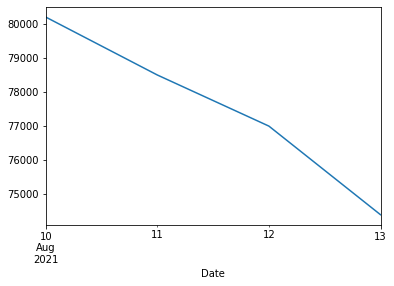

In [34]:
sseYahoo['Close'].plot()

<AxesSubplot:xlabel='Date'>

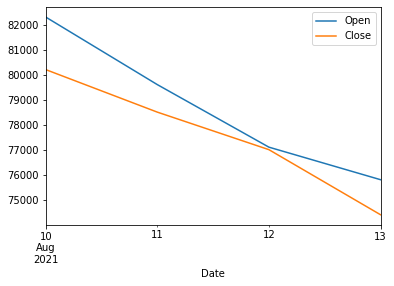

In [38]:
sseYahoo[['Open','Close']].plot()

In [5]:
df = web.DataReader('GE', 'yahoo',  start='2021-08-10', end='2021-08-13')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,104.269997,102.029999,103.559998,103.709999,7954700,103.709999
2021-08-10,106.330002,103.199997,103.809998,106.080002,8054900,106.080002
2021-08-11,106.209999,103.820000,106.209999,106.040001,8303700,106.040001
2021-08-12,107.230003,105.239998,106.190002,106.519997,6400300,106.519997
2021-08-13,106.620003,104.580002,106.500000,104.919998,5515753,104.919998


In [ ]:
df = web.DataReader(stock, data_source='yahoo', start=start)

* web.get_data_google() 또는 

* 전체를 읽을 수도 있고, 특정 행은 인덱스ix로 읽을 수 있다.
* 오래된 데이터는 읽어오지 못하고 있다.
* DataFrame의 Series인 Open에서 5행을 읽어보자.

In [46]:
soil.ix['2016-11-17']

Open       83100
High       83400
Low        81600
Close      82500
Volume    188825
Name: 2016-11-17 00:00:00, dtype: float64

In [49]:
print type(soil.Open)

<class 'pandas.core.series.Series'>


In [ ]:
soil.ix

In [44]:
print soil.Open[0:5]

Date
2016-11-17    83100
2016-11-18    82400
2016-11-21    82200
2016-11-22    84400
2016-11-23    85800
Name: Open, dtype: float64


In [50]:
ncsoft = web.DataReader('KRX:036570', data_source='google', start='01/01/2015', end='09/02/2015')
sds = web.DataReader('KRX:018260', data_source='google', start='11/01/2015', end='11/10/2015')

print sds.ix[1]

Open      148000
High      148500
Low       144500
Close     145500
Volume     57958
Name: 2016-11-18 00:00:00, dtype: float64


* Pandas data reader가 아닌 requests 라이브러리를 사용해서 읽을 수 있다.

import pandas
import requests
import io

stock = 'GOOG'
startdate = 'Jul 08, 2017'
enddate = 'Aug 08, 2017'

rooturl = 'http://www.google.com/finance/historical?q='
query = stock + '&startdate=' + startdate +'&enddate=' + enddate + '&output=csv'

url = rooturl + query
response = requests.get(url)
df = pandas.read_csv(io.StringIO(response.content.decode('utf-8')))

In [53]:
print df.ix[0]

﻿Date     15-Nov-17
Open        1019.21
High        1024.09
Low         1015.42
Close       1020.91
Volume       853992
Name: 0, dtype: object


# 연습문제 2: 서울시 우리마을가게 상권분석서비스(상권-아파트)

서울시 열린데이터에서 검색을 하면 '서울시 우리마을가게 상권분석서비스(상권-아파트)'가 있다.
(https://data.seoul.go.kr/dataList/OA-15566/S/1/datasetView.do?tab=A)
OpenAPI를 통해서 2021년 최근 100개 데이터를 수집하자.

* 샘플 url 2017년서울시 골목상권 프로파일링 정보(상권-아파트)
http://openapi.seoul.go.kr:8088/(인증키)/xml/InfoTrdarAptQq/1/5/2017

* 1) 프로그램으로 url을 만들어 출력하세요. 그 url을 클릭하면 데이터가 출력 되어야 한다.
* 2) 전체 데이터 중 1건만 출력.
* 3) 다음 항목을 100개 정렬해서 출력.

```
	TRDAR_SE_CD_NM	상권_구분_코드_명
	APT_HSMP_CO	아파트_단지_수
	PC_6_HDMIL_ABOVE_HSHLD_CO	아파트_가격_6_억_이상_세대_수
	AVRG_MKTC	아파트_평균_시가
	TRDAR_CD_NM	상권_코드_명
```

In [21]:
1   STDR_YY_CD	기준_년_코드
2	TRDAR_SE_CD	상권_구분_코드
3	TRDAR_SE_CD_NM	상권_구분_코드_명
4	APT_HSMP_CO	아파트_단지_수
5	AE_66_SQMT_BELO_HSHLD_CO	아파트_면적_66_제곱미터_미만_세대_수
6	AE_66_SQMT_HSHLD_CO	아파트_면적_66_제곱미터_세대_수
7	AE_99_SQMT_HSHLD_CO	아파트_면적_99_제곱미터_세대_수
8	AE_132_SQMT_HSHLD_CO	아파트_면적_132_제곱미터_세대_수
9	AE_165_SQMT_HSHLD_CO	아파트_면적_165_제곱미터_세대_수
10	PC_1_HDMIL_BELO_HSHLD_CO	아파트_가격_1_억_미만_세대_수
11	PC_1_HDMIL_HSHLD_CO	아파트_가격_1_억_세대_수
12	PC_2_HDMIL_HSHLD_CO	아파트_가격_2_억_세대_수
13	PC_3_HDMIL_HSHLD_CO	아파트_가격_3_억_세대_수
14	PC_4_HDMIL_HSHLD_CO	아파트_가격_4_억_세대_수
15	PC_5_HDMIL_HSHLD_CO	아파트_가격_5_억_세대_수
16	PC_6_HDMIL_ABOVE_HSHLD_CO	아파트_가격_6_억_이상_세대_수
17	AVRG_AE	아파트_평균_면적
18	AVRG_MKTC	아파트_평균_시가
19	STDR_QU_CD	기준_분기_코드
20	TRDAR_CD	상권_코드
21	TRDAR_CD_NM	상권_코드_명

SyntaxError: invalid syntax (<ipython-input-21-707c24dad3b3>, line 1)

In [22]:
%%writefile src/ds_open_tradeApt_json.py
#!/usr/bin/env python
# coding: utf-8
import os
import requests
import urllib
import mylib

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    # (1) make params with resource IDs
    KEY=key['dataseoul']
    TYPE='json'
    SERVICE='InfoTrdarAptQq'
    START_INDEX=str(1)
    END_INDEX=str(100)
    STDR_YM_CD=str(2021)
    params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX,STDR_YM_CD)
    # (2) make a full url
    _url='http://openAPI.seoul.go.kr:8088'
    #url=urllib.parse.urljoin(_url,params)
    url="/".join([_url,params])
    print("- url:", url)
    # (3) get data
    r=requests.get(url)
    apt=r.json()
    print("- data[0]: ", apt['InfoTrdarAptQq']['row'][0])
    for e in apt['InfoTrdarAptQq']['row']:
        print("{}\t{}\t{}\t{}\t{}".format(e['TRDAR_SE_CD_NM'],e['APT_HSMP_CO'],e['PC_6_HDMIL_ABOVE_HSHLD_CO'],e['AVRG_MKTC'],e['TRDAR_CD_NM']))
        #print (e['PC_1_HDMIL_HSHLD_CO']+e['PC_6_HDMIL_ABOVE_HSHLD_CO'])

if __name__ == "__main__":
    doIt()

Overwriting src/ds_open_tradeApt_json.py


In [23]:
!python3 src/ds_open_tradeApt_json.py

- url: http://openAPI.seoul.go.kr:8088/73725974496a736c34395757705847/json/InfoTrdarAptQq/1/100/2021
- data[0]:  {'STDR_YY_CD': '2021', 'TRDAR_SE_CD': 'A', 'TRDAR_SE_CD_NM': '골목상권', 'APT_HSMP_CO': 5.0, 'AE_66_SQMT_BELO_HSHLD_CO': 32.0, 'AE_66_SQMT_HSHLD_CO': 0.0, 'AE_99_SQMT_HSHLD_CO': 0.0, 'AE_132_SQMT_HSHLD_CO': 0.0, 'AE_165_SQMT_HSHLD_CO': 0.0, 'PC_1_HDMIL_BELO_HSHLD_CO': 0.0, 'PC_1_HDMIL_HSHLD_CO': 32.0, 'PC_2_HDMIL_HSHLD_CO': 0.0, 'PC_3_HDMIL_HSHLD_CO': 0.0, 'PC_4_HDMIL_HSHLD_CO': 0.0, 'PC_5_HDMIL_HSHLD_CO': 0.0, 'PC_6_HDMIL_ABOVE_HSHLD_CO': 0.0, 'AVRG_AE': 44.0, 'AVRG_MKTC': 150247619.0, 'STDR_QU_CD': '1', 'TRDAR_CD': '1000975', 'TRDAR_CD_NM': '동남로82길'}
골목상권	5.0	0.0	150247619.0	동남로82길
발달상권	3.0	0.0	161157476.0	당산역_2
발달상권	1.0	0.0	81750000.0	서울 성북구 안암역
전통시장	37.0	1.0	183067389.0	길동복조리시장
관광특구	71.0	87.0	409473123.0	이태원 관광특구
관광특구	8.0	271.0	237967427.0	동대문패션타운 관광특구
관광특구	5.0	0.0	112097903.0	종로·청계 관광특구
관광특구	22.0	1156.0	527347107.0	잠실 관광특구
골목상권	26.0	22.0	249322039.0	계동길
골목상권	5.0	0.0	8770049

## 연습문제 2: 서울시 지하철 실시간 도착정보 수집

서울시 교통정보과[TOPIS]에서 제공하는 API를 이용한 '지하철 실시간 도착정보'를 수집해보자.

http://swopenAPI.seoul.go.kr/api/subway/(인증키)/xml/realtimeStationArrival/0/5/서울

![alt text](figures/dataSeoulGoKr_subwayRealtime.png "subway arrival realtime by line")

realtimeStationArrival API 호출에 필요한 인자를 정리하면 다음과 같다.

변수명 | 타입 | 설명 
-----|-----|-----
KEY | String | 발급받은 인증키
TYPE | String | xml, xmlf, xls, json 데이터 형식
SERVICE | String | 서비스명 
START_INDEX | Integer | 페이징 시작번호
END_INDEX | Integer | 페이징 끝번호
statnNm | String | 지하철역명

In [ ]:
인증키신청했고...
414d7469756a736c35304274646c77
http://swopenAPI.seoul.go.kr/api/subway/414d7469756a736c35304274646c77/xml/realtimeStationArrival/0/5/서울

In [3]:
%%writefile src/ds_open_realtimeStationArrival_json.py
#!/usr/bin/env python
# coding: utf-8
import os
import requests
import urllib
import mylib

def doIt():
    #keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    #key=mylib.getKey(keyPath)
    # (1) make params with resource IDs
    KEY='414d7469756a736c35304274646c77'    #key['dataseoul']
    TYPE='json'
    SERVICE='realtimeStationArrival'
    START_INDEX=str(1)
    END_INDEX=str(10)
    statnNm='서울'
    params=os.path.join(KEY,TYPE,SERVICE,START_INDEX,END_INDEX,statnNm)
    # (2) make a full url
    _url='http://swopenAPI.seoul.go.kr/api/subway'
    #url=urllib.parse.urljoin(_url,params)
    url="/".join([_url,params])
    print(url)
    # (3) get data
    #r=requests.get(url)
    #arrival=r.json()
    #print(arrival)
    #for e in trade['VwsmTrdarFlpopQq']['row']:
        #print(e['TRDAR_CD_NM'])
        #print (e['TRDAR_CD'], e['TRDAR_CD_NM'], e['TOT_FLPOP_CO'], e['ML_FLPOP_CO'], e['FML_FLPOP_CO'])
    #for e in stations['SearchSTNBySubwayLineService']['row']:
        #print e['STATION_CD'], e['STATION_NM'], e['FR_CODE'], e['LINE_NUM']

if __name__ == "__main__":
    doIt()

Overwriting src/ds_open_realtimeStationArrival_json.py


In [4]:
!python3 src/ds_open_realtimeStationArrival_json.py

http://swopenAPI.seoul.go.kr/api/subway/414d7469756a736c35304274646c77/json/realtimeStationArrival/1/10/서울


출력은 다음과 같다.

순서 | 항목명 | 설명
-----|-----|-----
공통 | list_total_count | 총 데이터 건수 (정상조회 시 출력됨)
1 | subwayId | 지하철호선ID
2 | updnLine | 상하행선구분 (2호선 : (내선:0,외선:1),상행,하행)
3 | trainLineNm | 도착지방면 (성수행 - 구로디지털단지방면)
4 | subwayHeading | 내리는문방향 (오른쪽,왼쪽)
5 | statnFid | 이전지하철역ID
6 | statnTid | 다음지하철역ID
7 | statnId | 지하철역ID
8 | statnNm | 지하철역명
9 | trnsitCo | 환승노선수
10 | ordkey | 도착예정열차순번
11 | subwayList | 연계호선ID (1002, 1007 등 연계대상 호상ID)
12 | statnList | 연계지하철역ID (1002000233,1007000744)
13 | btrainSttus | 열차종류 (급행,ITX)
14 | barvlDt | 열차도착예정시간 (단위:초)
15 | btrainNo | 열차번호 (현재운행하고 있는 호선별 열차번호)
16 | bstatnId | 종착지하철역ID
17 | bstatnNm | 종착지하철역명
18 | recptnDt | 열차도착정보를 생성한 시각
19 | arvlMsg2 | 첫번째도착메세지 (전역 진입, 전역 도착 등)
20 | arvlMsg3 | 두번째도착메세지 (종합운동장 도착, 12분 후 (광명사거리) 등)
21 | arvlCd | 도착코드 (0:진입, 1:도착, 2:출발, 3:전역출발, 4:전역진입, 5:전역도착, 99:운행중)

## 연습문제 3: 기상청 단기예보

오류!!

서울시 종로구 관측소 현재 온도, 습도, 강수량 구하기

조건 | 샘플URL
-----|-----
관측소별 실시간 기상관측정보 조회 | http://openAPI.seoul.go.kr:8088/(인증키)/xml/RealtimeWeatherStation/1/5/
중구 관측소 실시간 기상관측정보 조회 | http://openAPI.seoul.go.kr:8088/(인증키)/xml/RealtimeWeatherStation/1/5/중구

단기예보 조회서비스는 개편되어 2.0이 발표되었다.
기상청_단기예보 조회서비스 VilageFcstInfoService_2.0


- getUltraSrtNcst 초단기실황조회
- getUltraSrtFcst 초단기예보조회
- getVilageFcst 단기예보조회
- getFcstVersion 예보버전조회

단기예보조회 getVilageFcst 메시지 명세

변수명 | 설명 
-----|-----
serviceKey | 발급받은 인증키
numOfRows | 한 페이지 결과 수 (Default: 10)
pageNo | 페이지 번호 (Default: 1)
dataType (선택) | 요청자료형식 (XML, JSON) (Default: XML)
base_date | 발표일자, YYYYMMDD형식의 문자열 (예: 20210628)
base_time | 발표시각 HHMM형식(예: 0500)
nx | 예보지점의 X 좌표값
ny | 예보지점의 Y 좌표값

http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst

In [ ]:
    
http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst
    ?serviceKey=인증키
    &numOfRows=10
    &pageNo=1
    &dataType=JSON
    &base_date=20210628
    &base_time=0500
    &nx=55
    &ny=127

* 샘플 실행하기
* regex

In [ ]:
import os
from src import mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=mylib.getKey(keyPath)

In [ ]:
_url='http://openAPI.seoul.go.kr:8088'
_key=str(key['gokr'])     # key to data.go.kr

#weatherurl='http://openAPI.seoul.go.kr:8088/sample/xml/RealtimeWeatherStation/1/5/'

In [ ]:
weatherurl="http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst"\
+"?serviceKey="+str(_key)\
+"&numOfRows=10"\
+"&pageNo=1"\
+"&base_date=202100902"\
+"&base_time=0500"\
+"&nx=55"\
+"&ny=127"

In [ ]:
print(weatherurl)

* 결과
```
1	SAWS_OBS_TM	측정일시
2	STN_NM	지점명
3	SAWS_TA_AVG	기온(℃)
4	SAWS_HD	습도(%)
5	CODE	풍향1
6	NAME	풍향2
7	SAWS_WS_AVG	풍속(m/s)
8	SAWS_RN_SUM	강수(mm)
9	SAWS_SOLAR	일사(Mj/㎡)
10	SAWS_SHINE	일조(hour)
```

In [ ]:
import requests

data=requests.get(weatherurl).text
print (data)

In [3]:
import requests
import re
weatherurl='http://openAPI.seoul.go.kr:8088/sample/xml/RealtimeWeatherStation/1/5/'
data=requests.get(weatherurl).text
print data
p=re.compile('<SAWS_TA_AVG>(.+?)</SAWS_TA_AVG>')
res=p.findall(data)
for item in res:
    print item

<?xml version="1.0" encoding="UTF-8"?><RealtimeWeatherStation>
<list_total_count>1</list_total_count>
<RESULT>
<CODE>INFO-000</CODE>
<MESSAGE>정상 처리되었습니다</MESSAGE>
</RESULT>
<row>
<SAWS_OBS_TM>2015092216</SAWS_OBS_TM>
<STN_NM>성동</STN_NM>
<SAWS_TA_AVG>30.1</SAWS_TA_AVG>
<SAWS_HD>29.2</SAWS_HD>
<CODE>7.0</CODE>
<NAME>남동</NAME>
<SAWS_WS_AVG>1.9</SAWS_WS_AVG>
<SAWS_RN_SUM>0</SAWS_RN_SUM>
<SAWS_SOLAR/>
<SAWS_SHINE/>
</row>
</RealtimeWeatherStation>

30.1


### 연습문제

* 광화문 지역 2015년 11월 하루 동안 시간대별 미세먼지량
* 공공데이터포털 의료빅데이터
* 구글 스칼라
    * 참조 http://code.activestate.com/recipes/523047-search-google-scholar/
* 국가통계포털 http://kosis.kr
    * 인구, 노동, 물가, 보건, 환경 등
* 지오코딩 - T Map, 다음, 네이버, 구글 (구글맵에 사용)
* 트레이딩
    * 파이썬으로 시스템 트레이딩 https://gist.github.com/ridingtide/51a40d87abe1bcfbc5ce xing api (이트레이드)
    * Statistical arbitrage with Python
http://nbviewer.ipython.org/github/harpone/PyArb/blob/master/PyArb%20Intro.ipynb?create=1